In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # For numerical operations, e.g., text length calculations
# Set a professional and readable plot style
sns.set_theme(style="whitegrid")
import json

In [2]:

print("Starting EDA for RBI Circular QA Dataset...")

# --- 1. Load the Dataset ---
print("\nLoading the dataset from Hugging Face...")
try:
    dataset = load_dataset("Vishva007/RBI-Circular-QA-Dataset")
    df_train = dataset['train'].to_pandas()
    df_eval = dataset['eval'].to_pandas()
    print("Dataset loaded successfully.")
    print(f"Train split size: {len(df_train)} rows")
    print(f"Eval split size: {len(df_eval)} rows")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please ensure you have internet connectivity or the dataset is properly configured.")
    # Exit or handle the error gracefully if dataset loading fails
    exit()


Starting EDA for RBI Circular QA Dataset...

Loading the dataset from Hugging Face...
Dataset loaded successfully.
Train split size: 12698 rows
Eval split size: 100 rows


In [3]:

# --- 2. Initial Data Inspection ---
print("\n--- Initial Data Inspection (Train Split) ---")
print("Train DataFrame Info:")
df_train.info()
print("\nTrain DataFrame Head:")
print(df_train.head())

print("\n--- Initial Data Inspection (Eval Split) ---")
print("Eval DataFrame Info:")
df_eval.info()
print("\nEval DataFrame Head:")
print(df_eval.head())



--- Initial Data Inspection (Train Split) ---
Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12698 entries, 0 to 12697
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   document              12698 non-null  object
 1   filename              12698 non-null  object
 2   model_name            12698 non-null  object
 3   regulation_area       12698 non-null  object
 4   applicable_to         12698 non-null  object
 5   issued_on             12698 non-null  object
 6   key_topics            12698 non-null  object
 7   chunks_text           12698 non-null  object
 8   is_table              12698 non-null  bool  
 9   question              12698 non-null  object
 10  answer                12698 non-null  object
 11  evaluation_criteria   12698 non-null  object
 12  category              12698 non-null  object
 13  estimated_difficulty  12698 non-null  int64 
 14  rephrased_questio


--- EDA for Categorical Features (Train Split) ---

Analyzing distribution of 'regulation_area' in Train Split:


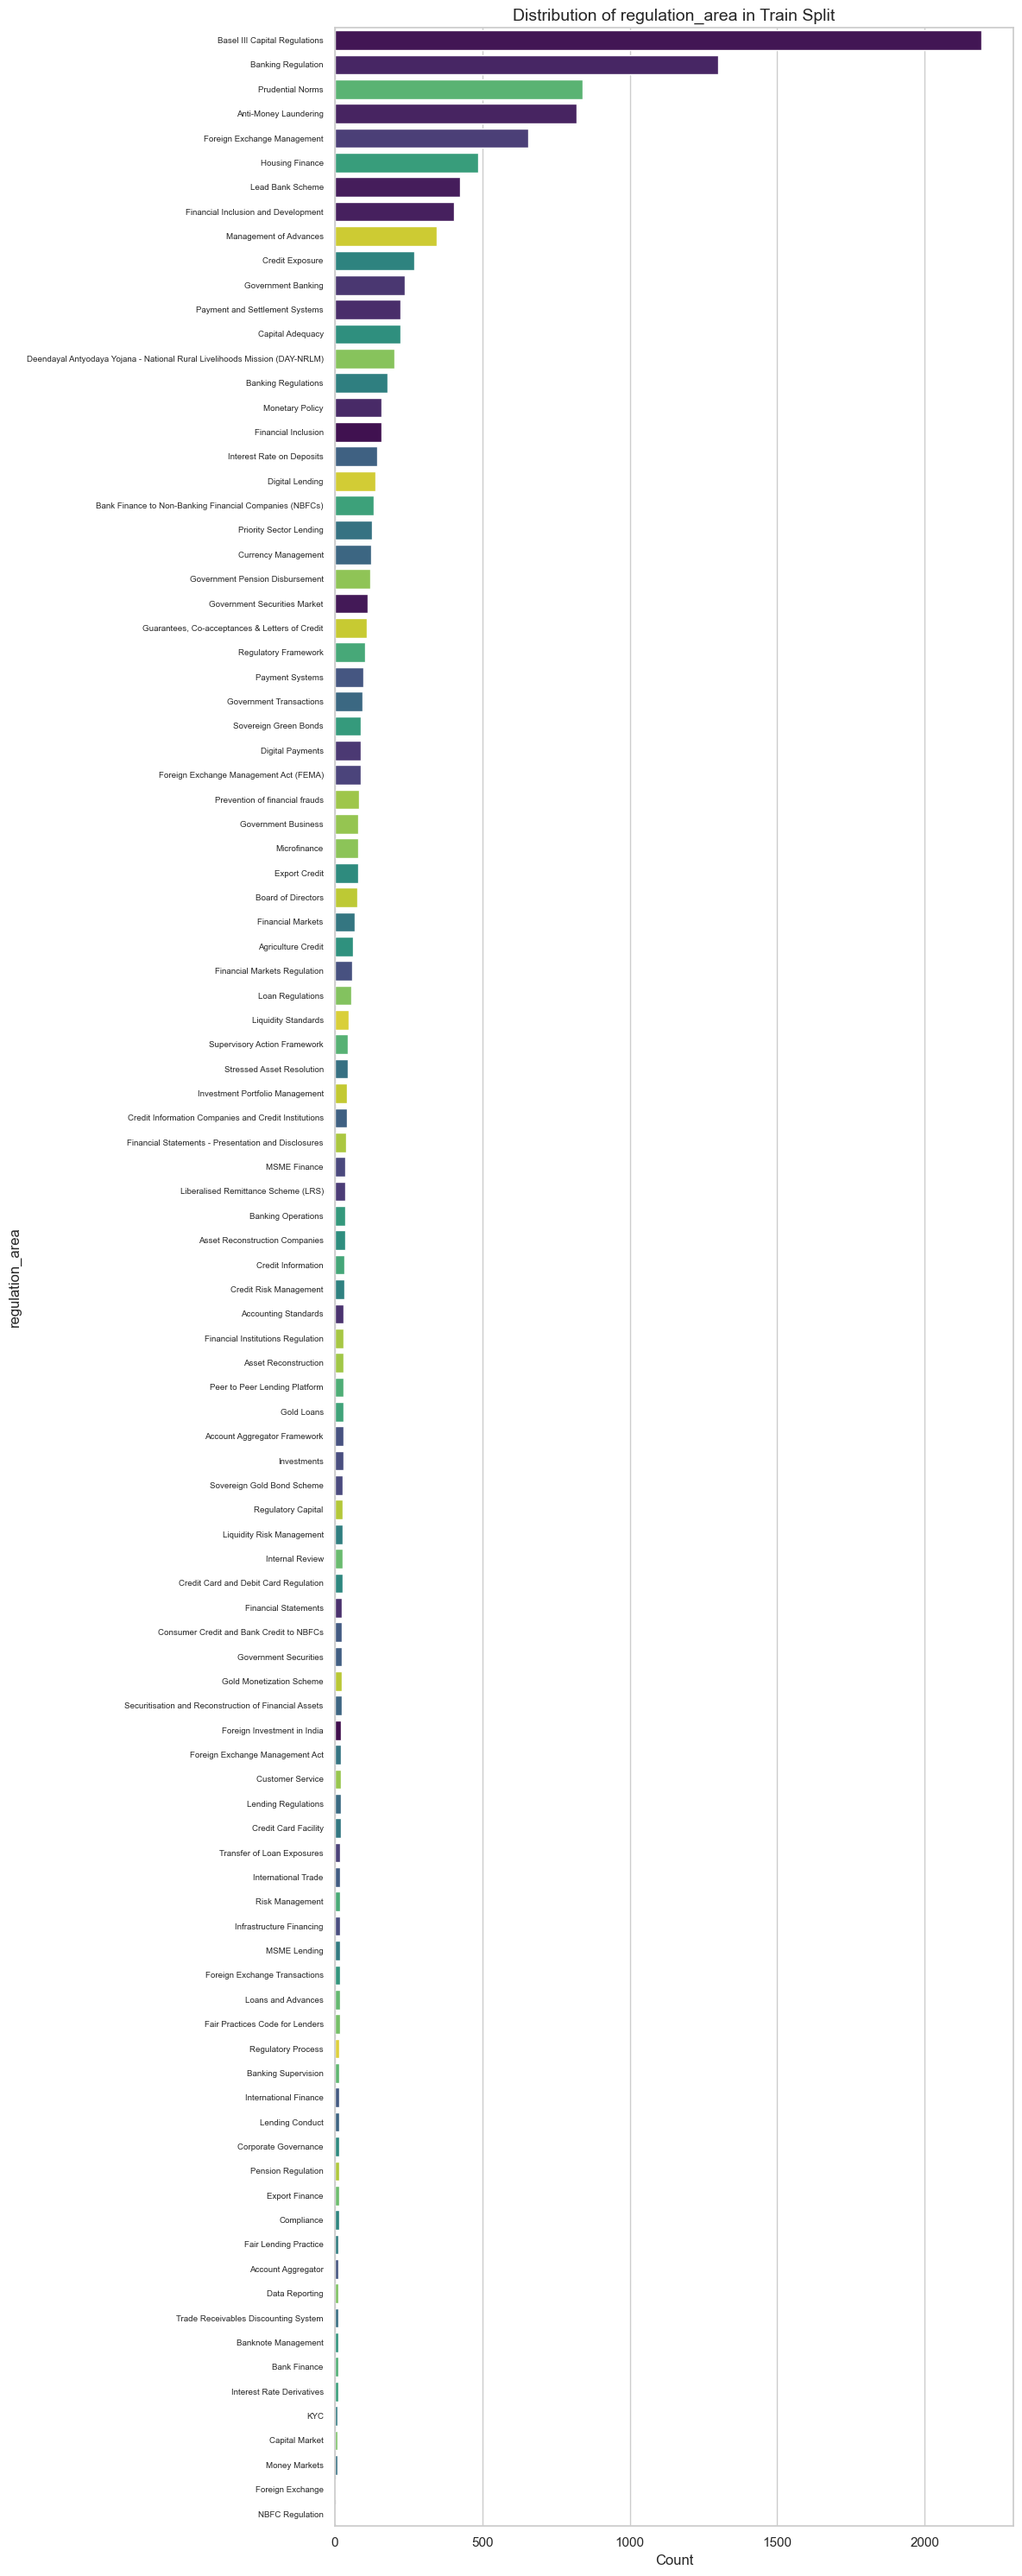

Value counts for 'regulation_area':
regulation_area
Basel III Capital Regulations    0.172547
Banking Regulation               0.102378
Prudential Norms                 0.066073
Anti-Money Laundering            0.064498
Foreign Exchange Management      0.051740
                                   ...   
KYC                              0.000788
Capital Market                   0.000788
Money Markets                    0.000788
Foreign Exchange                 0.000315
NBFC Regulation                  0.000158
Name: proportion, Length: 102, dtype: float64

Analyzing distribution of 'applicable_to' in Train Split:


C:\Users\vishva.r\AppData\Local\Temp\ipykernel_3288\136894037.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # This MUST be before plt.show()


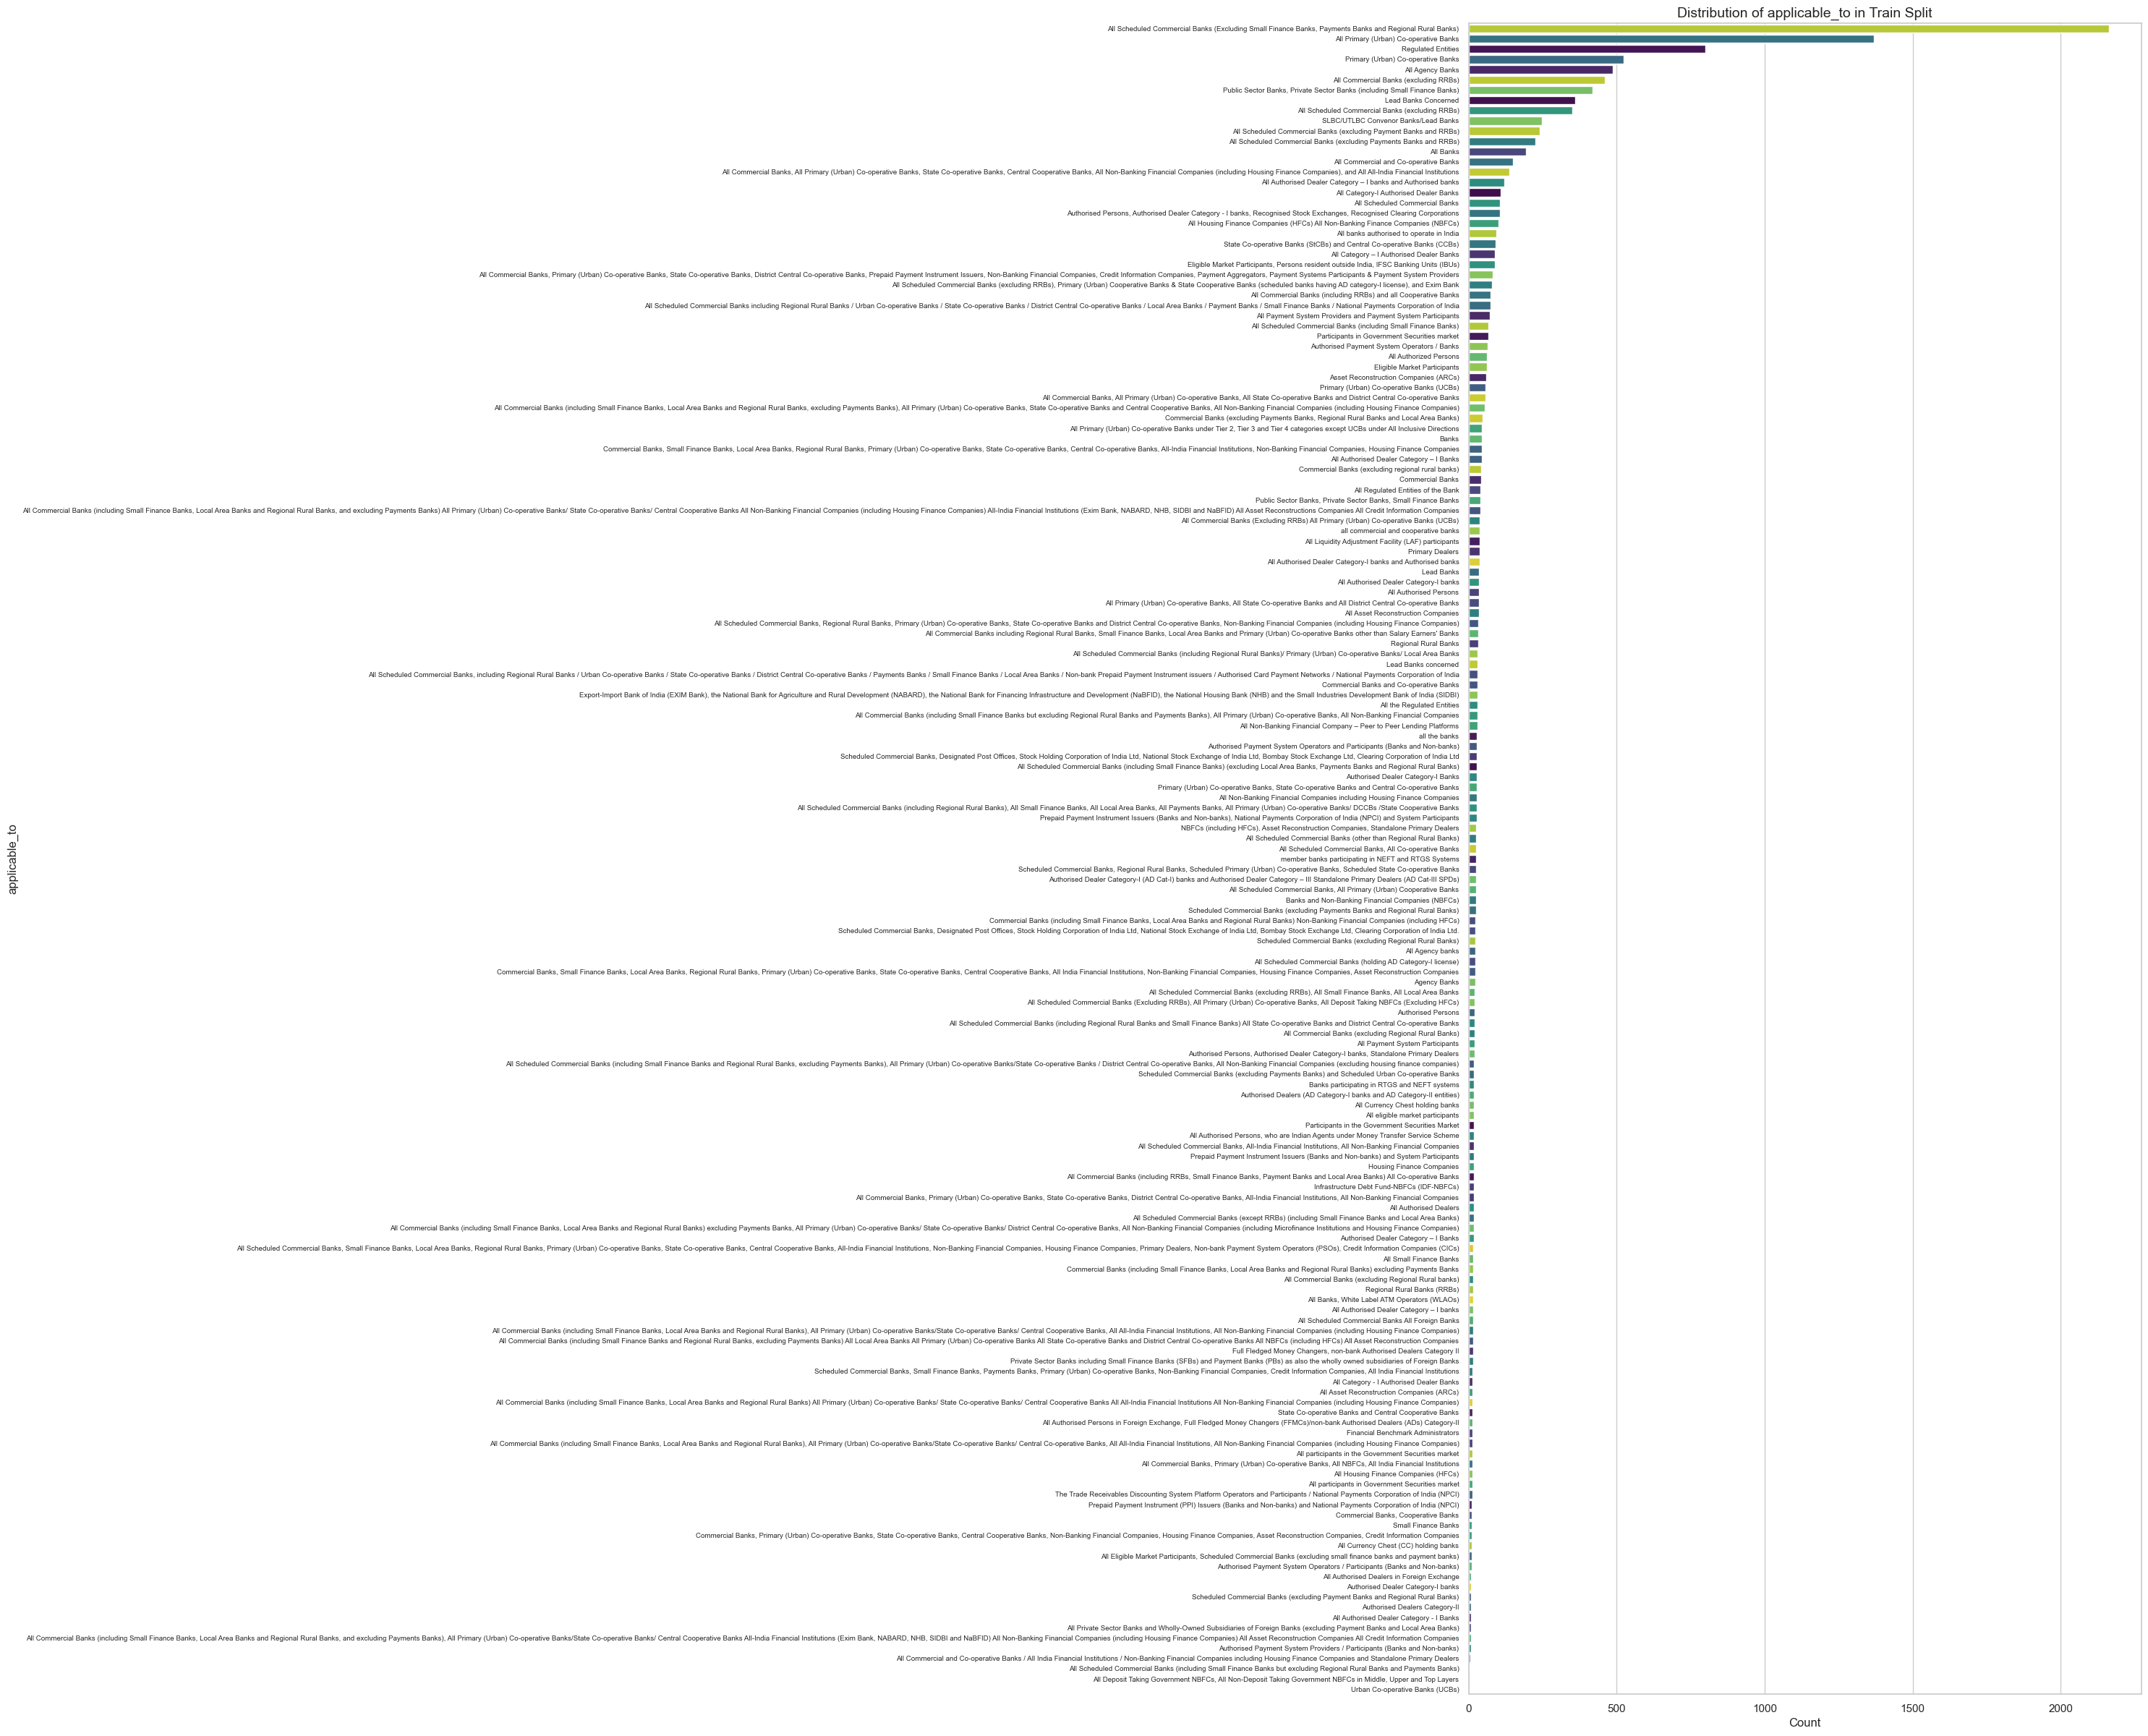

Value counts for 'applicable_to':
applicable_to
All Scheduled Commercial Banks (Excluding Small Finance Banks, Payments Banks and Regional Rural Banks)                                                                          0.170421
All Primary (Urban) Co-operative Banks                                                                                                                                           0.107812
Regulated Entities                                                                                                                                                               0.063002
Primary (Urban) Co-operative Banks                                                                                                                                               0.041188
All Agency Banks                                                                                                                                                                 0.038352
                      

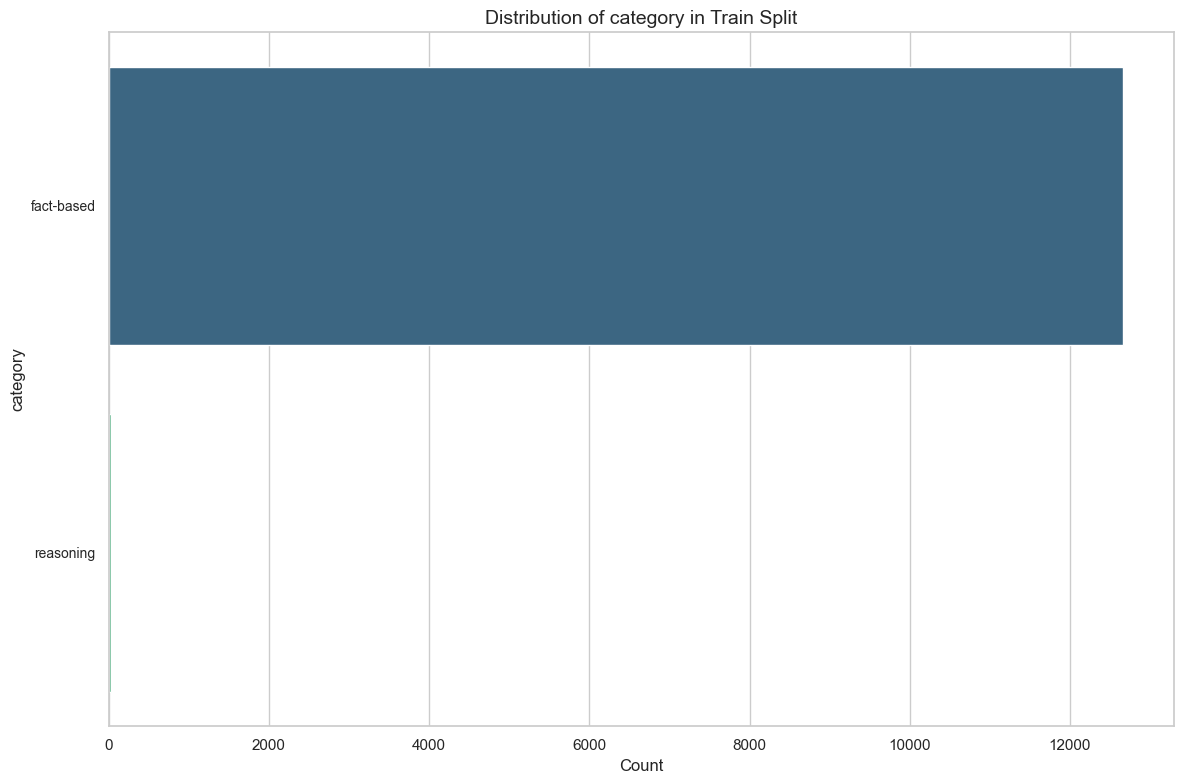

Value counts for 'category':
category
fact-based    0.997559
reasoning     0.002441
Name: proportion, dtype: float64

Analyzing distribution of 'estimated_difficulty' in Train Split:


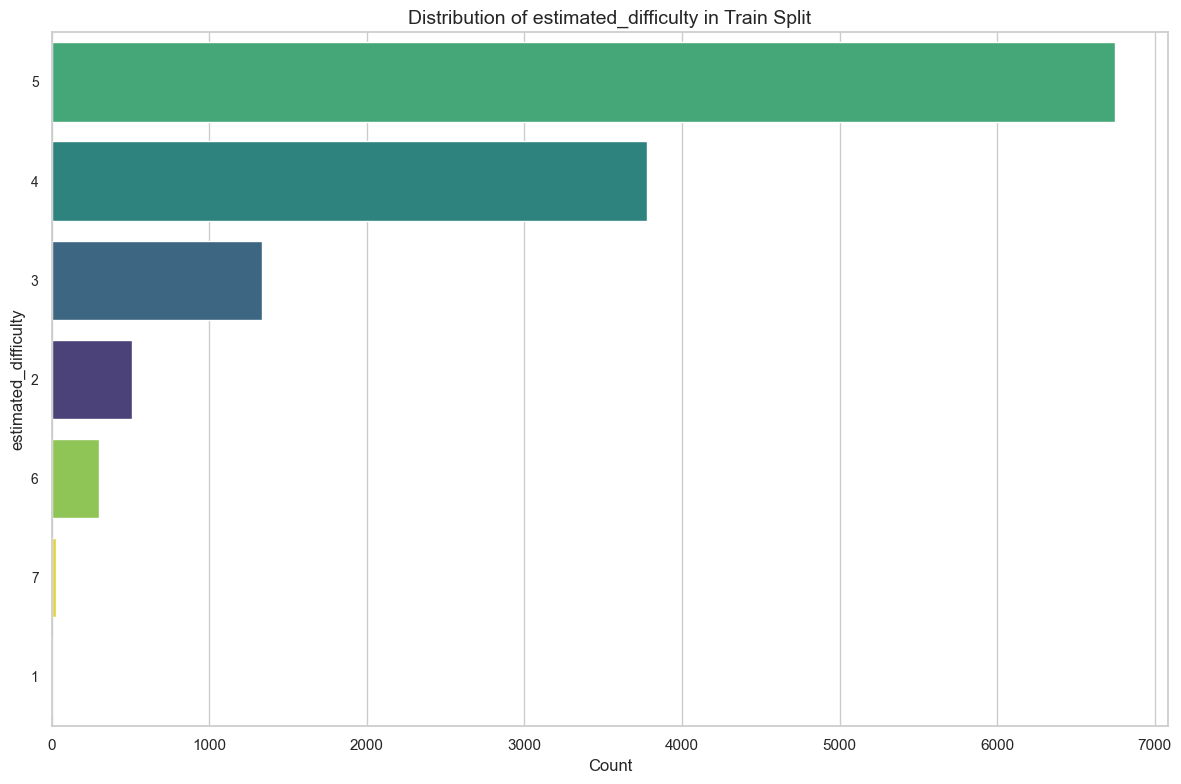

Value counts for 'estimated_difficulty':
estimated_difficulty
5    0.531501
4    0.297606
3    0.105056
2    0.040243
6    0.023468
7    0.002048
1    0.000079
Name: proportion, dtype: float64

Analyzing distribution of 'model_name' in Train Split:


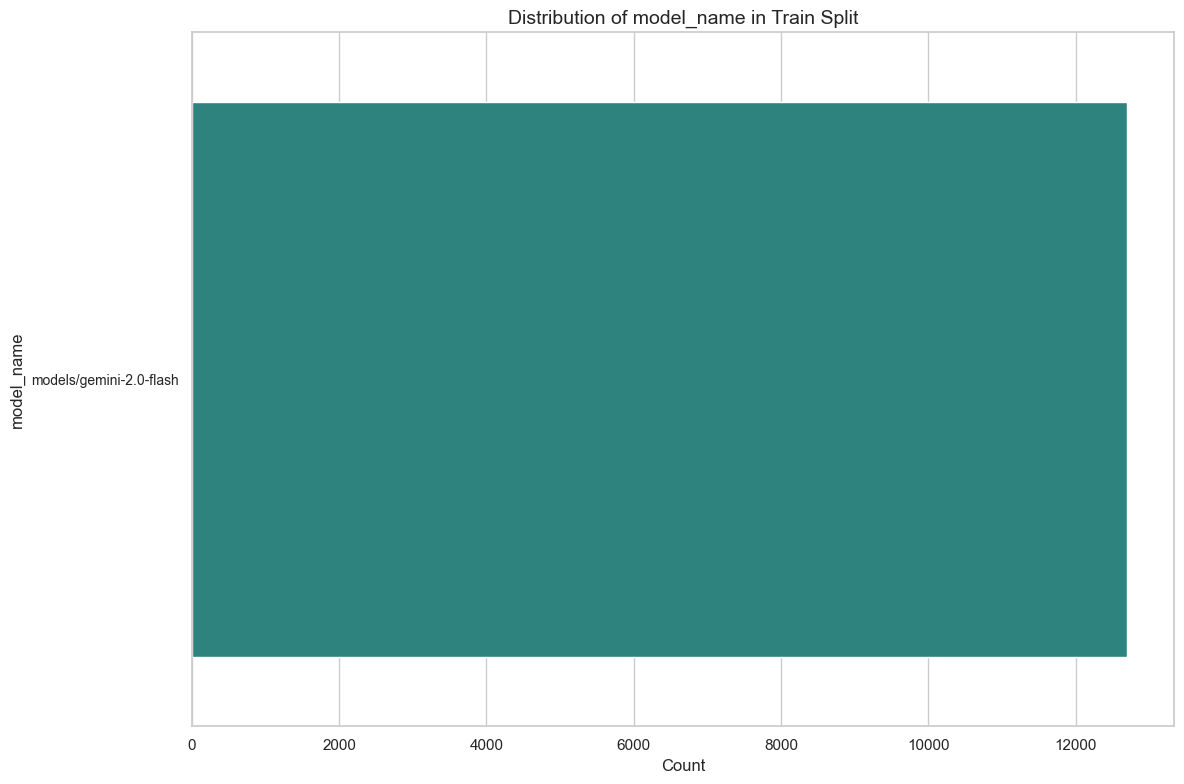

Value counts for 'model_name':
model_name
models/gemini-2.0-flash    1.0
Name: proportion, dtype: float64


In [4]:
# --- 3. EDA for Categorical Features (Train Split) ---
print("\n--- EDA for Categorical Features (Train Split) ---")

categorical_features = ['regulation_area', 'applicable_to', 'category', 'estimated_difficulty', 'model_name']

for feature in categorical_features:
    if feature in df_train.columns:
        print(f"\nAnalyzing distribution of '{feature}' in Train Split:")

        num_categories = df_train[feature].nunique()
        
        # Define a base height per category, might need a slight increase or fine-tuning
        # Let's try 0.45 or 0.5 for slightly more padding
        base_height_per_category = 0.5 # Increased slightly for better spacing
        
        # Calculate optimal height, with an adjusted minimum for plots with fewer categories
        # A higher minimum for plots that might still have label issues even with few categories
        dynamic_height = max(max(6, num_categories * base_height_per_category), 8) # Ensure a minimum height of 8 if it's very few categories too
        dynamic_height = min(dynamic_height, 30) # Cap max height to avoid overly large plots

        plt.figure(figsize=(12, dynamic_height)) 

        sns.countplot(data=df_train, y=feature, order=df_train[feature].value_counts().index, hue=feature, palette='viridis', legend=False)
        plt.title(f'Distribution of {feature} in Train Split', fontsize=14) # Increase title font size for clarity
        plt.xlabel('Count', fontsize=12)
        plt.ylabel(feature, fontsize=12)

        # Apply more nuanced label size adjustments
        if num_categories > 20: # For very many categories
            plt.tick_params(axis='y', labelsize=7) 
        elif num_categories > 10: # For moderately many categories
            plt.tick_params(axis='y', labelsize=9)
        else: # For few categories, default or slightly larger
            plt.tick_params(axis='y', labelsize=10) # Keep a good size if few categories

        # For very long individual labels (e.g., in 'applicable_to' if some names are very long)
        # This isn't directly controllable through tick_params, but more horizontal space helps
        # We can increase figure width if necessary, but 12 usually suffices for horizontal bars.
        
        plt.tight_layout() # This MUST be before plt.show()
        plt.show()

        print(f"Value counts for '{feature}':")
        print(df_train[feature].value_counts(normalize=True))


--- EDA for Categorical Features (Eval Split) ---

Analyzing distribution of 'regulation_area' in Eval Split:


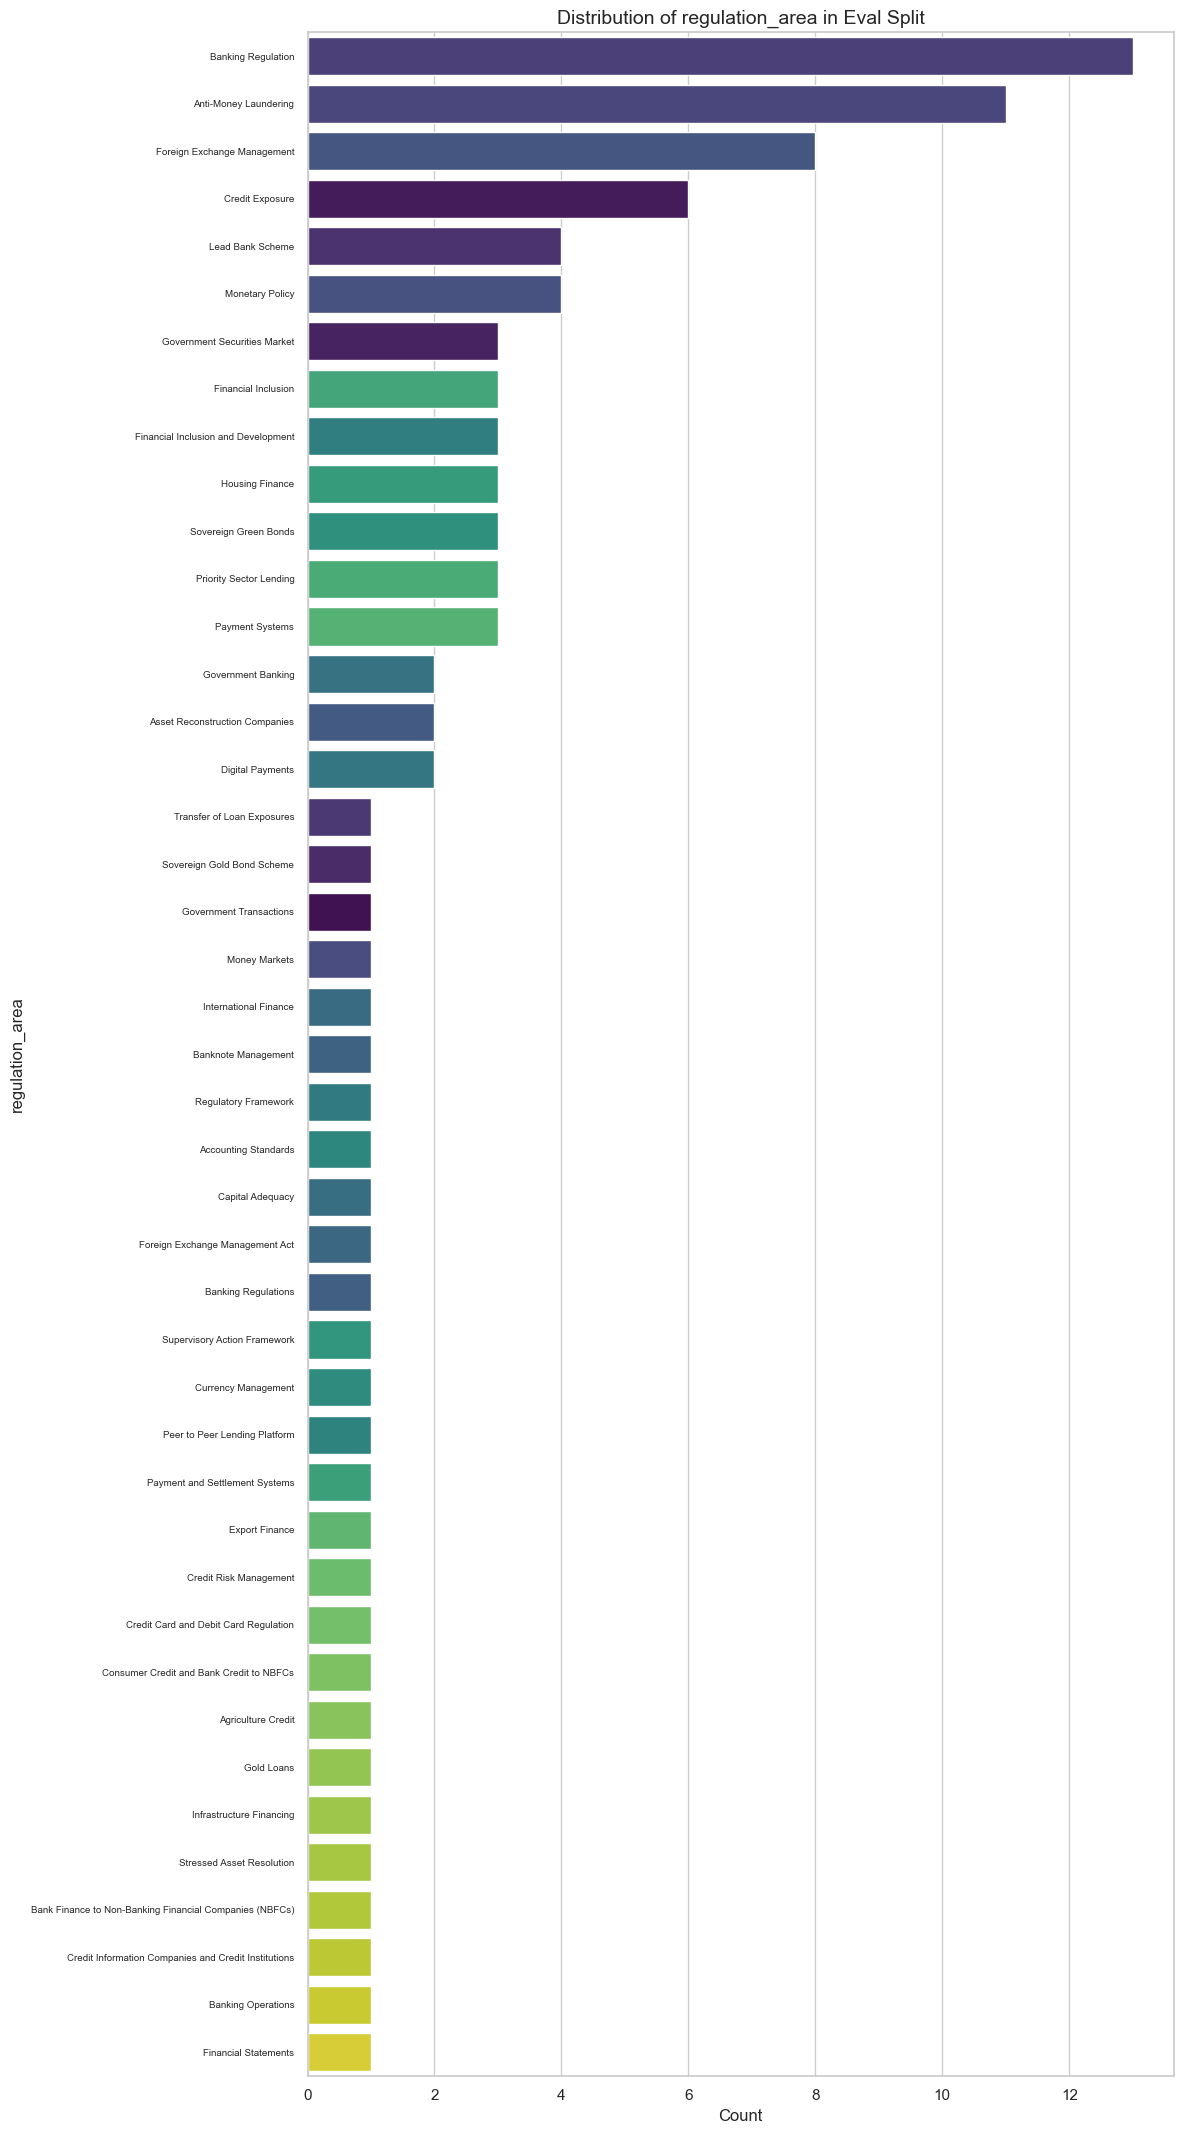

Value counts for 'regulation_area':
regulation_area
Banking Regulation                                         0.13
Anti-Money Laundering                                      0.11
Foreign Exchange Management                                0.08
Credit Exposure                                            0.06
Lead Bank Scheme                                           0.04
Monetary Policy                                            0.04
Government Securities Market                               0.03
Financial Inclusion                                        0.03
Financial Inclusion and Development                        0.03
Housing Finance                                            0.03
Sovereign Green Bonds                                      0.03
Priority Sector Lending                                    0.03
Payment Systems                                            0.03
Government Banking                                         0.02
Asset Reconstruction Companies                      

C:\Users\vishva.r\AppData\Local\Temp\ipykernel_3288\1480781348.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


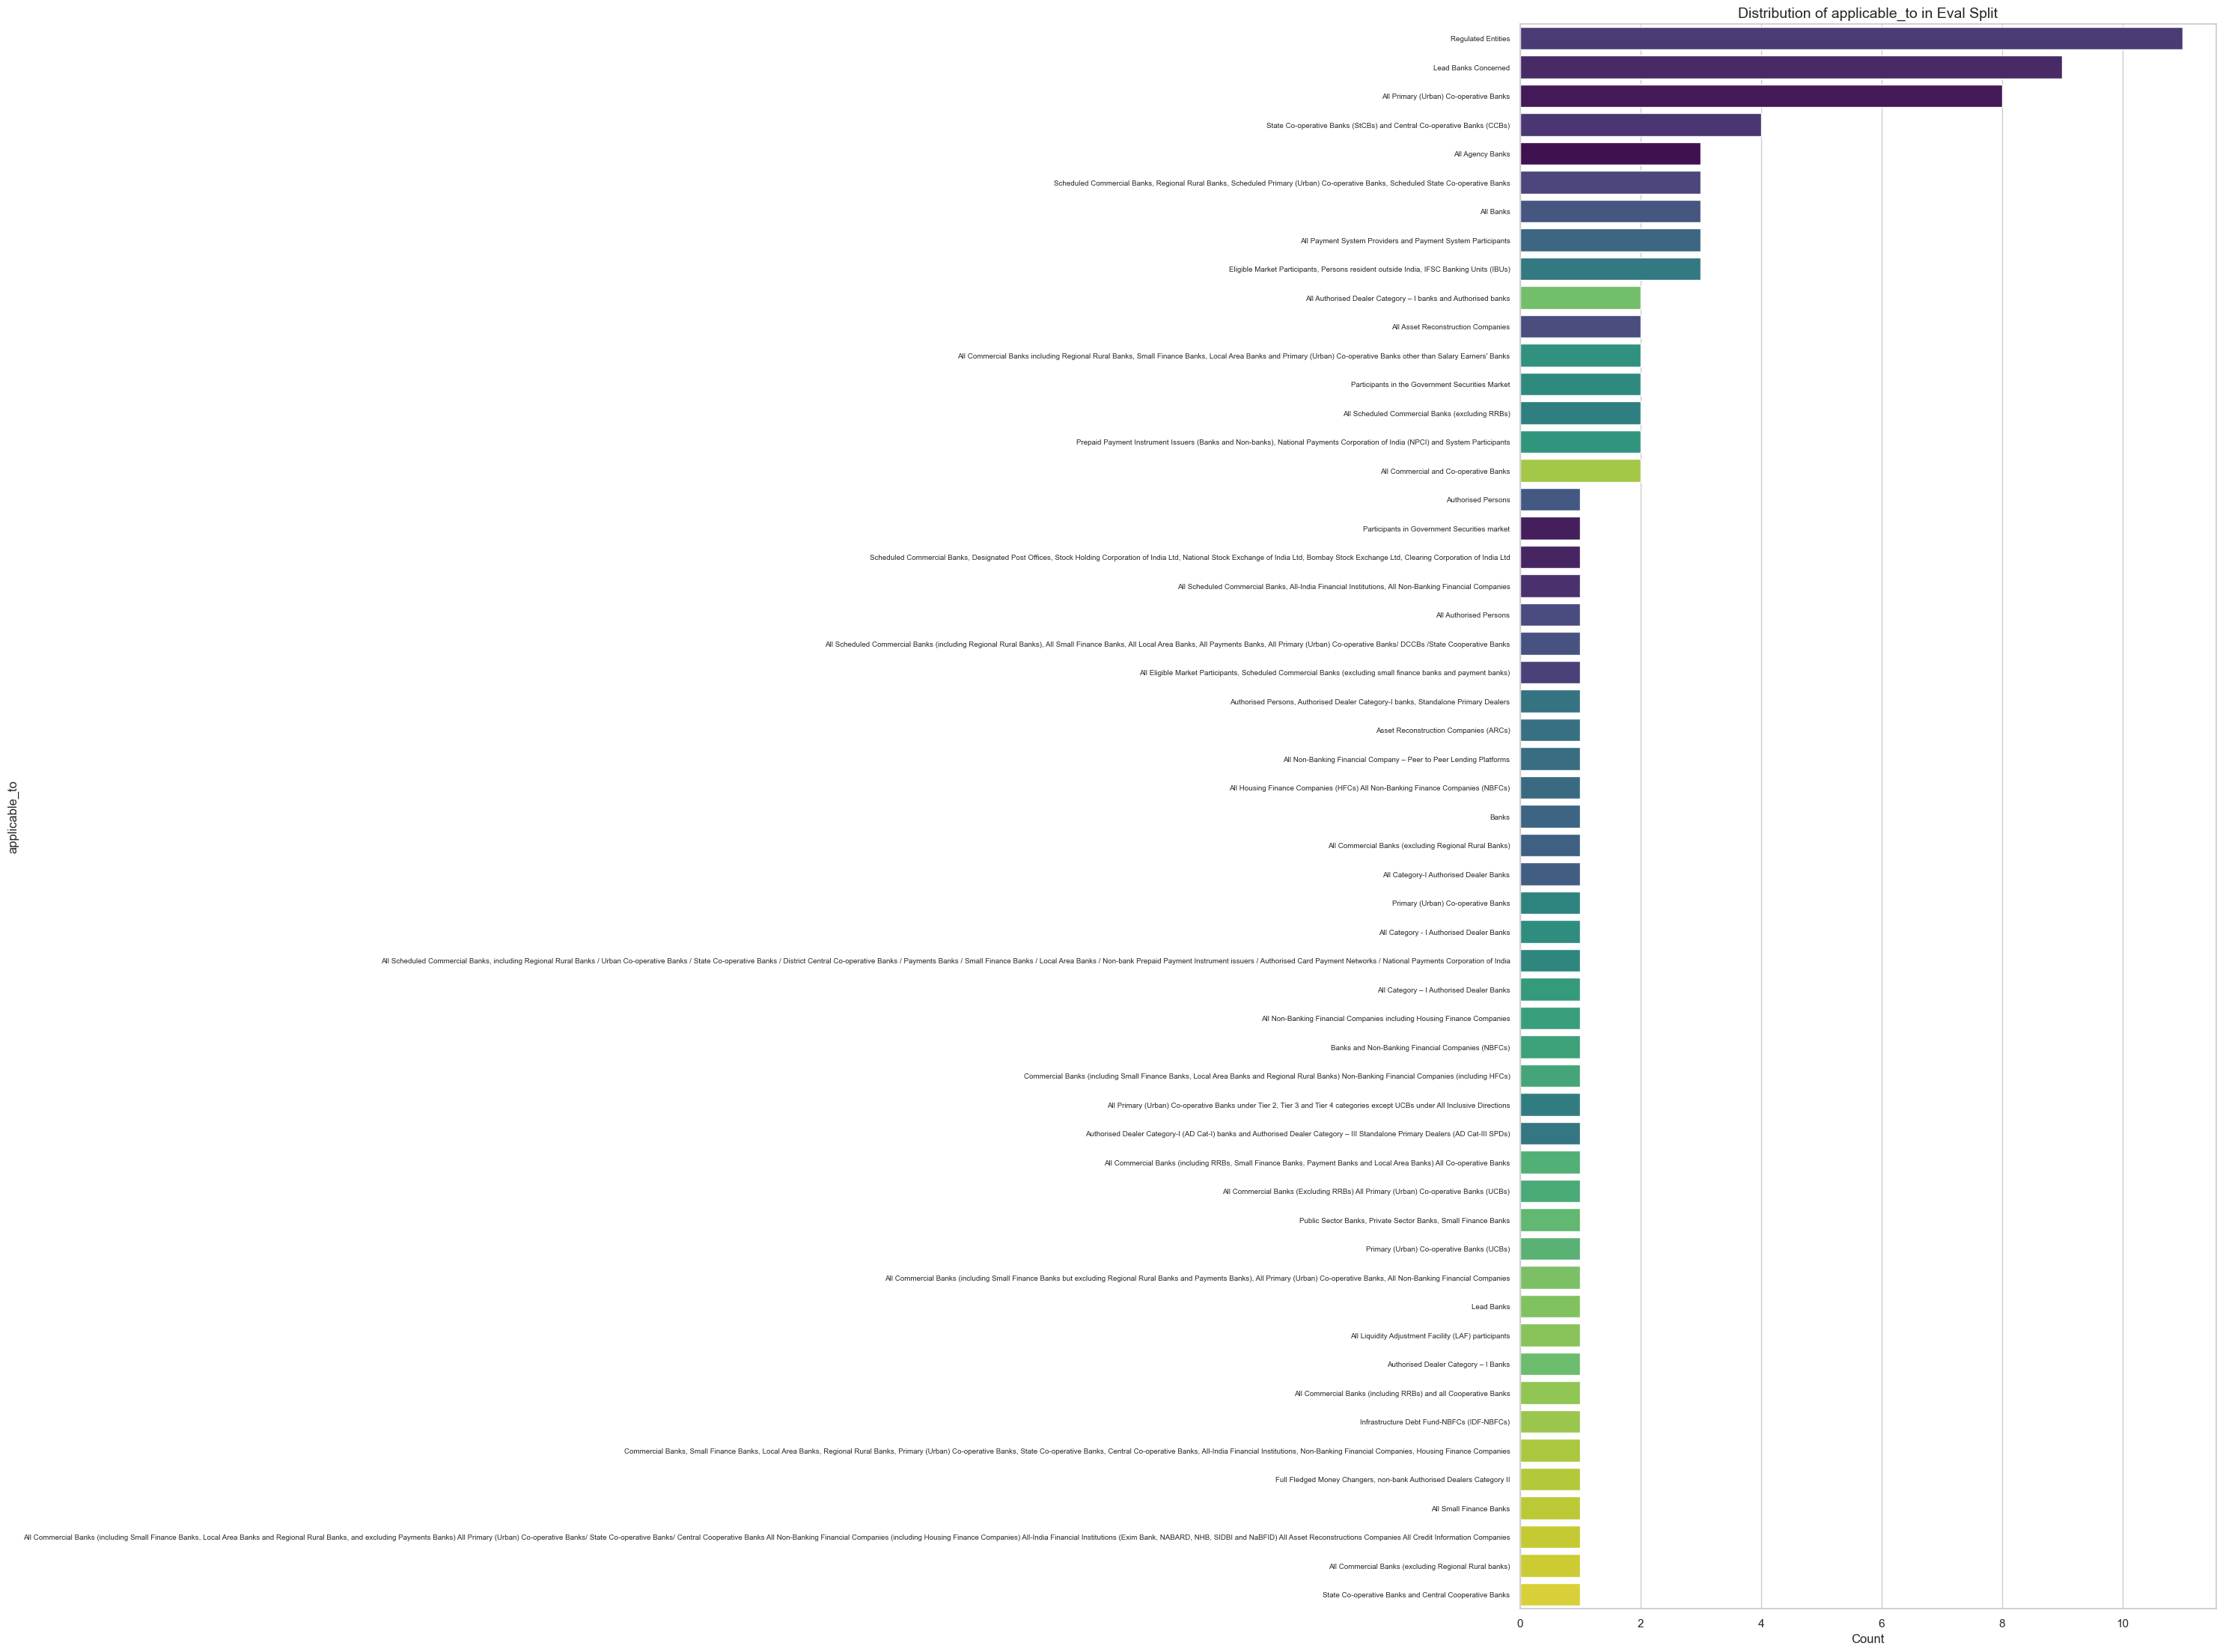

Value counts for 'applicable_to':
applicable_to
Regulated Entities                                                                                                                                                                                                                                                                                                                                                                                                                                      0.11
Lead Banks Concerned                                                                                                                                                                                                                                                                                                                                                                                                                                    0.09
All Primary (Urban) Co-operative Banks                        

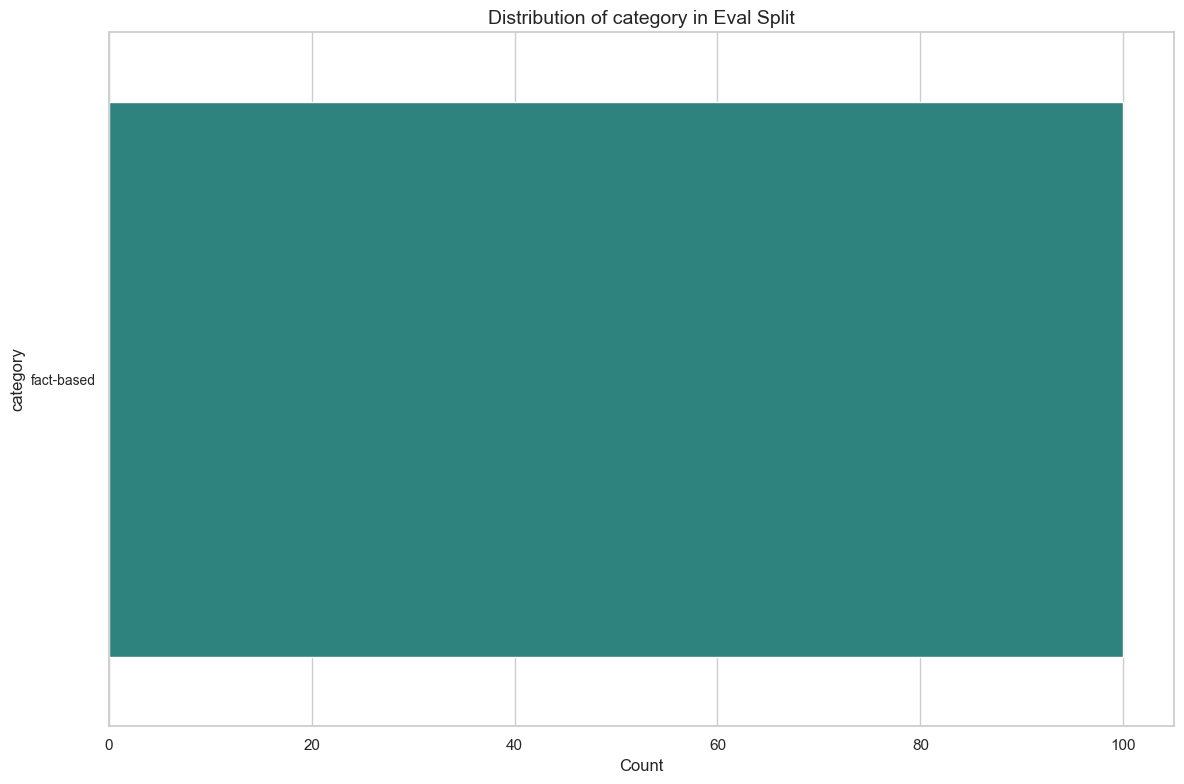

Value counts for 'category':
category
fact-based    1.0
Name: proportion, dtype: float64

Analyzing distribution of 'estimated_difficulty' in Eval Split:


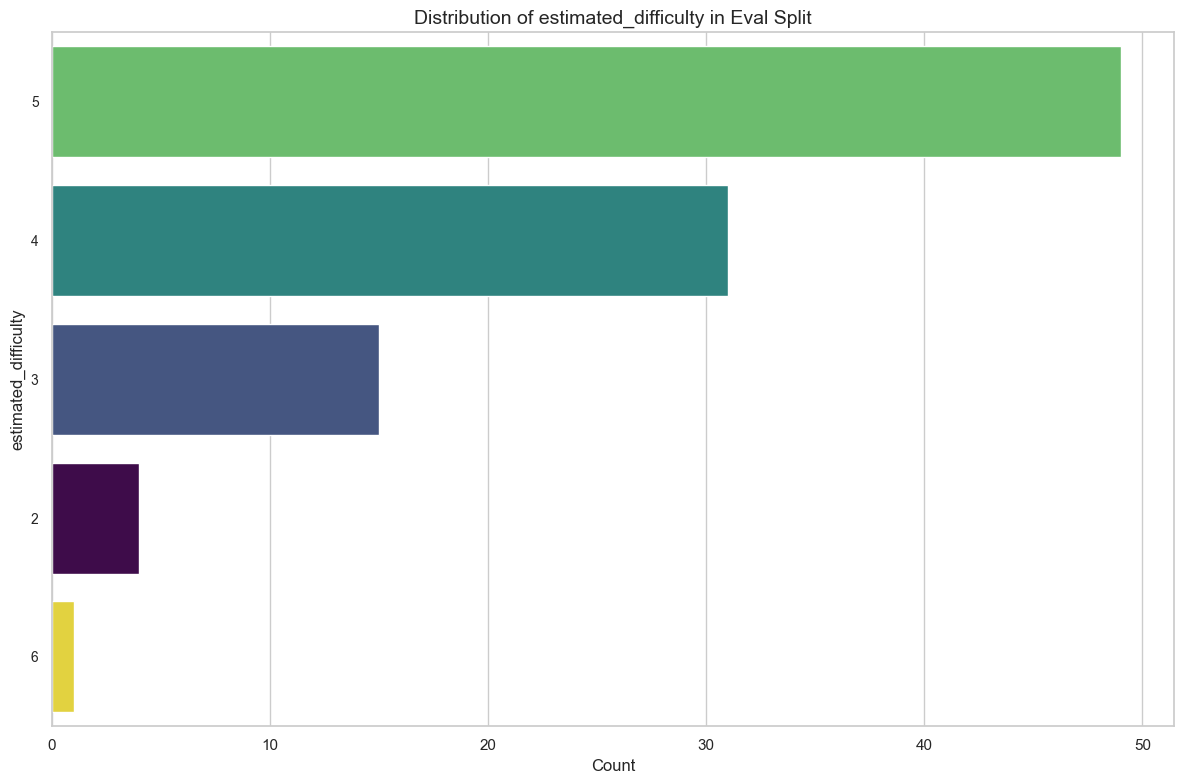

Value counts for 'estimated_difficulty':
estimated_difficulty
5    0.49
4    0.31
3    0.15
2    0.04
6    0.01
Name: proportion, dtype: float64


In [5]:
# --- 4. EDA for Categorical Features (Eval Split) ---
print("\n--- EDA for Categorical Features (Eval Split) ---")
# Model_name is consistent, no need to plot again for eval if it's always Gemini-2.0-flash
eval_categorical_features = ['regulation_area', 'applicable_to', 'category', 'estimated_difficulty']

for feature in eval_categorical_features:
    if feature in df_eval.columns: # Ensure the feature exists in eval split
        print(f"\nAnalyzing distribution of '{feature}' in Eval Split:")

        num_categories = df_eval[feature].nunique() # <<< Use df_eval here
        
        # Base height per category, potentially adjusted for eval's smaller size or specific needs
        base_height_per_category = 0.5 
        
        # Calculate optimal height, ensuring a minimum height for readability
        # The eval split is smaller, so distributions will be sparser. Adjust min height if needed.
        dynamic_height = max(max(6, num_categories * base_height_per_category), 8)
        dynamic_height = min(dynamic_height, 30) 

        plt.figure(figsize=(12, dynamic_height)) 

        # *** CORRECTED LINE: Use df_eval for data and ordering! ***
        sns.countplot(data=df_eval, y=feature, order=df_eval[feature].value_counts().index, hue=feature, palette='viridis', legend=False)
        
        plt.title(f'Distribution of {feature} in Eval Split', fontsize=14)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel(feature, fontsize=12)

        # Apply nuanced label size adjustments for eval split
        if num_categories > 20: 
            plt.tick_params(axis='y', labelsize=7) 
        elif num_categories > 10: 
            plt.tick_params(axis='y', labelsize=9)
        else: 
            plt.tick_params(axis='y', labelsize=10) 
            
        plt.tight_layout()
        plt.show()

        print(f"Value counts for '{feature}':")
        print(df_eval[feature].value_counts(normalize=True))


--- Text Length Analysis (Train Split) ---

Descriptive statistics for text lengths (Train Split):
       question_len    answer_len     chunk_len
count  12698.000000  12698.000000  12698.000000
mean      20.096629     52.326114    633.020318
std        5.743956     24.791118    999.385379
min        5.000000      2.000000     11.000000
25%       16.000000     34.000000    325.000000
50%       20.000000     49.000000    695.000000
75%       24.000000     66.000000    766.000000
max       60.000000    219.000000  31198.000000


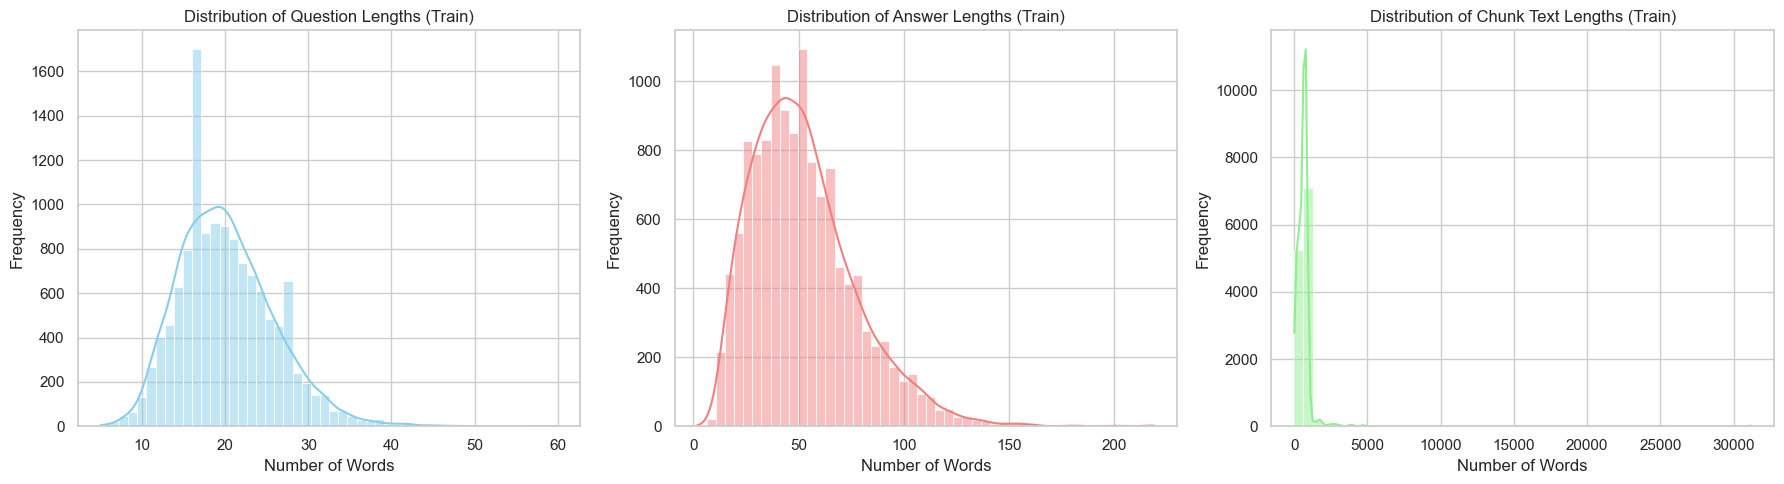

In [6]:

# --- 5. Text Length Analysis ---
print("\n--- Text Length Analysis (Train Split) ---")

# Calculate lengths for original question and answer
df_train['question_len'] = df_train['question'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
df_train['answer_len'] = df_train['answer'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
df_train['chunk_len'] = df_train['chunks_text'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

print("\nDescriptive statistics for text lengths (Train Split):")
print(df_train[['question_len', 'answer_len', 'chunk_len']].describe())

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train['question_len'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Question Lengths (Train)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_train['answer_len'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Answer Lengths (Train)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_train['chunk_len'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Chunk Text Lengths (Train)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



--- Text Length Analysis (Eval Split) ---

Descriptive statistics for text lengths (Eval Split):
       question_len  answer_len  rephrased_question_len  rephrased_answer_len  \
count    100.000000  100.000000              100.000000            100.000000   
mean      20.210000   47.960000               21.210000             48.040000   
std        5.659166   23.635669                6.659534             24.497751   
min        8.000000   15.000000                8.000000             12.000000   
25%       16.000000   27.750000               16.000000             31.000000   
50%       20.000000   46.000000               21.000000             45.000000   
75%       23.000000   60.250000               26.000000             62.250000   
max       38.000000  153.000000               38.000000            164.000000   

         chunk_len  
count   100.000000  
mean    459.790000  
std     264.686523  
min      38.000000  
25%     254.250000  
50%     459.000000  
75%     667.500000  
max 

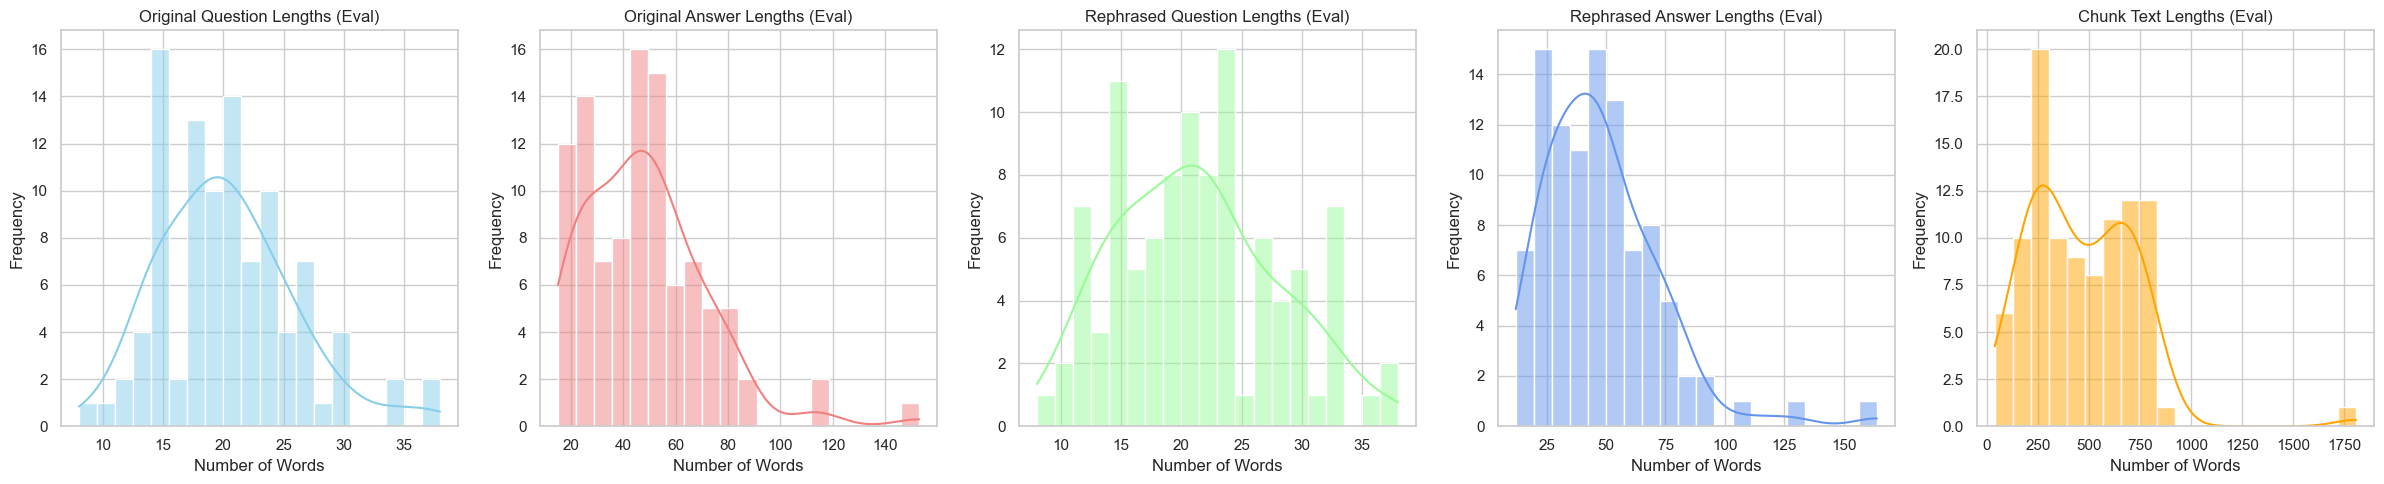

In [7]:

# --- 6. Text Length Analysis (Eval Split) ---
print("\n--- Text Length Analysis (Eval Split) ---")

# Calculate lengths for original and rephrased questions/answers
df_eval['question_len'] = df_eval['question'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
df_eval['answer_len'] = df_eval['answer'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
df_eval['rephrased_question_len'] = df_eval['rephrased_question'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
df_eval['rephrased_answer_len'] = df_eval['rephrased_answer'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
df_eval['chunk_len'] = df_eval['chunks_text'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)


print("\nDescriptive statistics for text lengths (Eval Split):")
print(df_eval[['question_len', 'answer_len', 'rephrased_question_len', 'rephrased_answer_len', 'chunk_len']].describe())

plt.figure(figsize=(24, 5)) # Increased figure size for more subplots

plt.subplot(1, 5, 1)
sns.histplot(df_eval['question_len'], bins=20, kde=True, color='skyblue') # Fewer bins for smaller eval set
plt.title('Original Question Lengths (Eval)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 5, 2)
sns.histplot(df_eval['answer_len'], bins=20, kde=True, color='lightcoral')
plt.title('Original Answer Lengths (Eval)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 5, 3)
sns.histplot(df_eval['rephrased_question_len'], bins=20, kde=True, color='palegreen')
plt.title('Rephrased Question Lengths (Eval)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 5, 4)
sns.histplot(df_eval['rephrased_answer_len'], bins=20, kde=True, color='cornflowerblue')
plt.title('Rephrased Answer Lengths (Eval)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 5, 5)
sns.histplot(df_eval['chunk_len'], bins=20, kde=True, color='orange')
plt.title('Chunk Text Lengths (Eval)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



Calculating text lengths...
Text lengths calculated.

--- Mapping numerical difficulty to categorical labels ---
New 'estimated_difficulty_mapped' column created.
Mapped difficulty value counts (Train):
estimated_difficulty_mapped
medium    11862
easy        512
hard        324
Name: count, dtype: int64
Mapped difficulty value counts (Eval):
estimated_difficulty_mapped
medium    95
easy       4
hard       1
Name: count, dtype: int64

--- Diagnostic Checks for 'estimated_difficulty_mapped' and 'answer_len' (Train Split) ---
Unique values in 'estimated_difficulty_mapped' (Train):
['medium' 'easy' 'hard']

Value counts for 'estimated_difficulty_mapped' (Train):
estimated_difficulty_mapped
medium    11862
easy        512
hard        324
Name: count, dtype: int64

Missing values in 'answer_len' (Train): 0
Missing values in 'estimated_difficulty_mapped' (Train): 0

--- Diagnostic Checks for 'estimated_difficulty_mapped' and 'rephrased_answer_len' (Eval Split) ---
Unique values in 'estimated

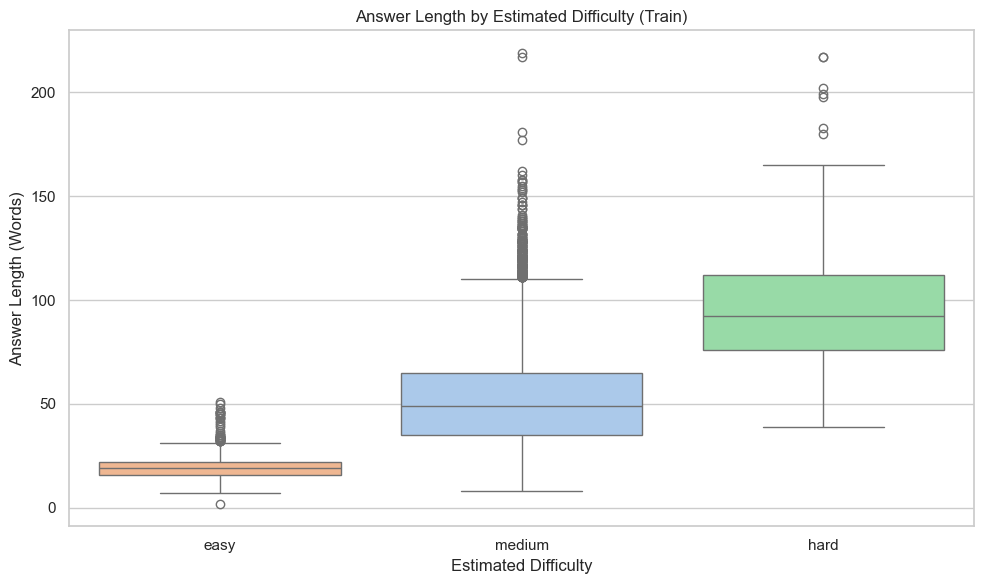


--- Cross-Analysis (Eval Split: Difficulty vs. Rephrased Answer Length) ---


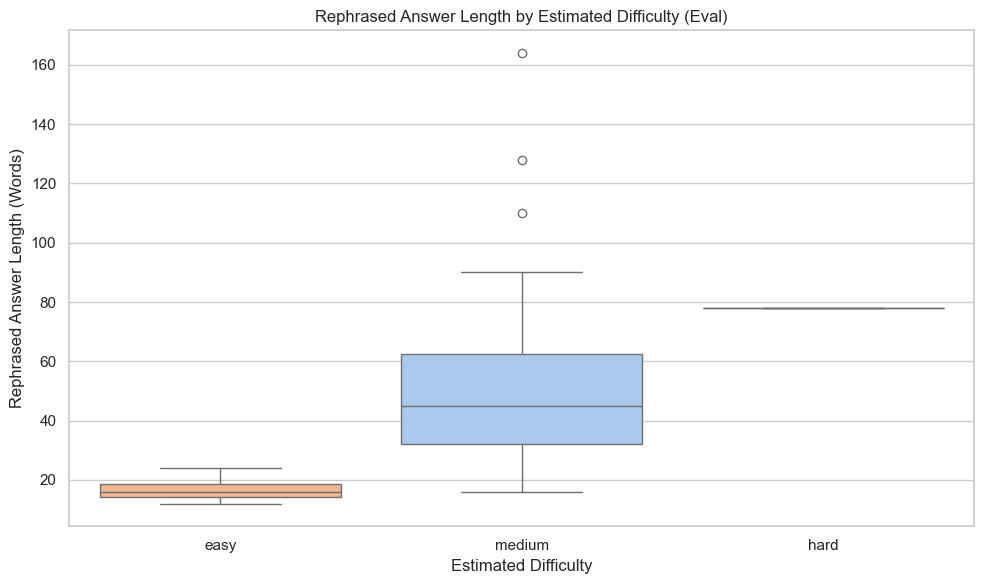


EDA complete. Review the plots and value counts to identify potential skewness or imbalances.
Consider how these distributions might impact your model's learning for specific categories or lengths.
For instance, if 'hard' questions are very rare, or if answers for a specific 'regulation_area' are consistently much longer, this could explain performance plateaus.


In [8]:
# --- Pre-calculate lengths ---
print("\nCalculating text lengths...")
df_train['question_len'] = df_train['question'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
df_train['answer_len'] = df_train['answer'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
df_train['chunk_len'] = df_train['chunks_text'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

df_eval['question_len'] = df_eval['question'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
df_eval['answer_len'] = df_eval['answer'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
df_eval['rephrased_question_len'] = df_eval['rephrased_question'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
df_eval['rephrased_answer_len'] = df_eval['rephrased_answer'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
df_eval['chunk_len'] = df_eval['chunks_text'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
print("Text lengths calculated.")


# --- MAPPING NUMERIC DIFFICULTY TO CATEGORICAL ---
print("\n--- Mapping numerical difficulty to categorical labels ---")
def map_difficulty(difficulty_score):
    if pd.isna(difficulty_score):
        return np.nan # Keep NaN if it's already NaN
    # Assuming integer scores from 1 to 7 based on your output
    if difficulty_score in [1, 2]:
        return 'easy'
    elif difficulty_score in [3, 4, 5]:
        return 'medium'
    elif difficulty_score in [6, 7]:
        return 'hard'
    else:
        return 'unknown' # Handle any unexpected scores

df_train['estimated_difficulty_mapped'] = df_train['estimated_difficulty'].apply(map_difficulty)
df_eval['estimated_difficulty_mapped'] = df_eval['estimated_difficulty'].apply(map_difficulty)

print("New 'estimated_difficulty_mapped' column created.")
print("Mapped difficulty value counts (Train):")
print(df_train['estimated_difficulty_mapped'].value_counts(dropna=False))
print("Mapped difficulty value counts (Eval):")
print(df_eval['estimated_difficulty_mapped'].value_counts(dropna=False))

# --- DIAGNOSTIC CHECKS (updated for mapped column) ---
print("\n--- Diagnostic Checks for 'estimated_difficulty_mapped' and 'answer_len' (Train Split) ---")
print("Unique values in 'estimated_difficulty_mapped' (Train):")
print(df_train['estimated_difficulty_mapped'].unique())
print("\nValue counts for 'estimated_difficulty_mapped' (Train):")
print(df_train['estimated_difficulty_mapped'].value_counts(dropna=False)) # dropna=False to see NaN counts

print("\nMissing values in 'answer_len' (Train):", df_train['answer_len'].isnull().sum())
print("Missing values in 'estimated_difficulty_mapped' (Train):", df_train['estimated_difficulty_mapped'].isnull().sum())

# Check for categories that might be in order but not in data
expected_order = ['easy', 'medium', 'hard'] # This is now the correct order for the mapped data
for category in expected_order:
    if category not in df_train['estimated_difficulty_mapped'].unique():
        print(f"Warning: Category '{category}' is in 'order' but not found in df_train['estimated_difficulty_mapped'].")
    else:
        # Check if there are valid (non-NaN) answer_len values for this category
        valid_count = df_train[df_train['estimated_difficulty_mapped'] == category]['answer_len'].notna().sum()
        if valid_count == 0:
            print(f"Warning: Category '{category}' has no valid 'answer_len' values in df_train.")

print("\n--- Diagnostic Checks for 'estimated_difficulty_mapped' and 'rephrased_answer_len' (Eval Split) ---")
print("Unique values in 'estimated_difficulty_mapped' (Eval):")
print(df_eval['estimated_difficulty_mapped'].unique())
print("\nValue counts for 'estimated_difficulty_mapped' (Eval):")
print(df_eval['estimated_difficulty_mapped'].value_counts(dropna=False))

print("\nMissing values in 'rephrased_answer_len' (Eval):", df_eval['rephrased_answer_len'].isnull().sum())
print("Missing values in 'estimated_difficulty_mapped' (Eval):", df_eval['estimated_difficulty_mapped'].isnull().sum())
for category in expected_order:
    if category not in df_eval['estimated_difficulty_mapped'].unique():
        print(f"Warning: Category '{category}' is in 'order' but not found in df_eval['estimated_difficulty_mapped'].")
    else:
        valid_count = df_eval[df_eval['estimated_difficulty_mapped'] == category]['rephrased_answer_len'].notna().sum()
        if valid_count == 0:
            print(f"Warning: Category '{category}' has no valid 'rephrased_answer_len' values in df_eval.")


# --- Filter data before plotting to ensure no problematic rows ---
# Now use the new mapped column
df_train_filtered = df_train.dropna(subset=['estimated_difficulty_mapped', 'answer_len']).copy()
df_train_filtered = df_train_filtered[df_train_filtered['estimated_difficulty_mapped'].isin(expected_order)].copy()

df_eval_filtered = df_eval.dropna(subset=['estimated_difficulty_mapped', 'rephrased_answer_len']).copy()
df_eval_filtered = df_eval_filtered[df_eval_filtered['estimated_difficulty_mapped'].isin(expected_order)].copy()


# --- Cross-Analysis (e.g., Difficulty vs. Length) ---
print("\n--- Cross-Analysis (Train Split: Difficulty vs. Answer Length) ---")
if not df_train_filtered.empty:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df_train_filtered, 
        x='estimated_difficulty_mapped', # <<< USE MAPPED COLUMN
        y='answer_len', 
        order=expected_order, 
        hue='estimated_difficulty_mapped', # <<< USE MAPPED COLUMN
        palette='pastel', 
        legend=False 
    )
    plt.title('Answer Length by Estimated Difficulty (Train)')
    plt.xlabel('Estimated Difficulty')
    plt.ylabel('Answer Length (Words)')
    plt.tight_layout()
    plt.show()
else:
    print("Skipping Train Split boxplot: No valid data after filtering.")

print("\n--- Cross-Analysis (Eval Split: Difficulty vs. Rephrased Answer Length) ---")
if not df_eval_filtered.empty:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df_eval_filtered, 
        x='estimated_difficulty_mapped', # <<< USE MAPPED COLUMN
        y='rephrased_answer_len', 
        order=expected_order, 
        hue='estimated_difficulty_mapped', # <<< USE MAPPED COLUMN
        palette='pastel', 
        legend=False 
    )
    plt.title('Rephrased Answer Length by Estimated Difficulty (Eval)')
    plt.xlabel('Estimated Difficulty')
    plt.ylabel('Rephrased Answer Length (Words)')
    plt.tight_layout()
    plt.show()
else:
    print("Skipping Eval Split boxplot: No valid data after filtering.")


print("\nEDA complete. Review the plots and value counts to identify potential skewness or imbalances.")
print("Consider how these distributions might impact your model's learning for specific categories or lengths.")
print("For instance, if 'hard' questions are very rare, or if answers for a specific 'regulation_area' are consistently much longer, this could explain performance plateaus.")


In [9]:
EVALUATION_REPORT_PATH = r"eval.json"

In [10]:
# --- 1. Load the Original Dataset (Eval Split) ---
print("\nLoading the original dataset (Eval Split)...")
try:
    dataset = load_dataset("Vishva007/RBI-Circular-QA-Dataset")
    df_eval = dataset['eval'].to_pandas()
    print(f"Original Eval split loaded successfully. Size: {len(df_eval)} rows.")
except Exception as e:
    print(f"Error loading original dataset: {e}")
    exit()


Loading the original dataset (Eval Split)...
Original Eval split loaded successfully. Size: 100 rows.


In [ ]:
# --- Pre-calculate lengths for the original eval split ---
# These are needed to join with evaluation scores later
print("Calculating text lengths for original Eval split...")
df_eval['question_len'] = df_eval['question'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0) # type: ignore
df_eval['answer_len'] = df_eval['answer'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0) # type: ignore
df_eval['rephrased_question_len'] = df_eval['rephrased_question'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0) # type: ignore
df_eval['rephrased_answer_len'] = df_eval['rephrased_answer'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0) # type: ignore
df_eval['chunk_len'] = df_eval['chunks_text'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0) # type: ignore
print("Text lengths calculated.")

Calculating text lengths for original Eval split...
Text lengths calculated.


In [ ]:
# --- 2. Map Numeric Difficulty to Categorical (as done in previous EDA) ---
print("\nMapping numerical difficulty to categorical labels for Eval Split...")
def map_difficulty(difficulty_score):
    if pd.isna(difficulty_score):
        return np.nan
    if difficulty_score in [1, 2]:
        return 'easy'
    elif difficulty_score in [3, 4, 5]:
        return 'medium'
    elif difficulty_score in [6, 7]:
        return 'hard'
    else:
        return 'unknown' # For any unexpected scores

df_eval['estimated_difficulty_mapped'] = df_eval['estimated_difficulty'].apply(map_difficulty) # type: ignore
print("Difficulty mapping complete for Eval Split.")


# --- 3. Load Evaluation Results from JSON ---
print(f"\nLoading evaluation results from {EVALUATION_REPORT_PATH}...")
try:
    with open(EVALUATION_REPORT_PATH, 'r', encoding='utf-8') as f:
        evaluation_report = json.load(f)
    generated_eval_results = evaluation_report.get("evaluation_results", [])
    evaluation_summary = evaluation_report.get("evaluation_summary", {})
    
    print(f"Evaluation report loaded successfully. Found {len(generated_eval_results)} individual results.")
    print("\nEvaluation Summary:")
    for k, v in evaluation_summary.items():
        if isinstance(v, float):
            print(f"- {k}: {v:.2f}")
        else:
            print(f"- {k}: {v}")

except FileNotFoundError:
    print(f"Error: Evaluation report not found at {EVALUATION_REPORT_PATH}.")
    print("Please ensure the path is correct and the evaluation script has been run.")
    exit()
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from {EVALUATION_REPORT_PATH}. Check file integrity.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading evaluation report: {e}")
    exit()



Mapping numerical difficulty to categorical labels for Eval Split...
Difficulty mapping complete for Eval Split.

Loading evaluation results from eval.json...
Evaluation report loaded successfully. Found 100 individual results.

Evaluation Summary:
- total_evaluations_attempted: 100
- successful_evaluations: 100
- failed_evaluations_due_to_error: 0
- total_passed_criteria: 43
- percentage_passed_criteria: 43.00
- overall_evaluation_summary: Out of 100 attempted evaluations, 100 were successfully processed by Gemini. 0 evaluations encountered an error. Among the successfully evaluated answers, 43 met all criteria, resulting in a 43.00% pass rate.


In [13]:
# Convert generated_eval_results to DataFrame for easier merging
df_eval_results = pd.DataFrame(generated_eval_results)

# --- 4. Merge DataFrames ---
# Merge based on 'question' (or 'rephrased_question' as used in evaluation)
# Assuming 'question' in df_eval_results corresponds to 'rephrased_question' in df_eval
# and 'ground_truth_answer' in df_eval_results corresponds to 'rephrased_answer' in df_eval

# For a robust merge, it's best to merge on a unique identifier if available.
# Since the eval_dataset was zipped with generated_answers_data, the order should match.
# However, if 'question' itself isn't unique, we might need a reset_index().
# Given the small eval set (100 samples) and the direct zipping, a simple concatenation
# after ensuring order is often effective or a merge on rephrased_question is reasonable.

# Let's ensure columns match for merging by renaming in df_eval_results
# The evaluation function uses 'rephrased_question' internally, but stores as 'question' in results
df_eval_results_merged = df_eval.copy()
df_eval_results_merged['generated_answer'] = df_eval_results['generated_answer']
df_eval_results_merged['evaluation_score'] = df_eval_results['evaluation_score']

# Verify merge by comparing some columns or length
if len(df_eval_results_merged) != len(df_eval_results):
    print("Warning: Length mismatch after merging! Data might not be aligned correctly.")
    # For robust merge, if questions aren't guaranteed unique, you'd need unique IDs
    # merged_df = pd.merge(df_eval, df_eval_results, left_on='rephrased_question', right_on='question', how='inner')
    # print(f"Merged DataFrame size: {len(merged_df)} rows.")

print(f"\nMerged evaluation scores with original eval dataset. Total rows: {len(df_eval_results_merged)}")
print("Merged DataFrame Head:")
print(df_eval_results_merged[['rephrased_question', 'rephrased_answer', 'generated_answer', 'evaluation_score', 'estimated_difficulty_mapped', 'regulation_area']].head())



Merged evaluation scores with original eval dataset. Total rows: 100
Merged DataFrame Head:
                                  rephrased_question  \
0  What prompted the designation of March 31, 202...   
1  What categories of loans are classified as sec...   
2  What are the limitations on Urban Co-operative...   
3  In the context of the Fully Accessible Route (...   
4  Could you outline the primary procedures and p...   

                                    rephrased_answer  \
0  To guarantee that all governmental income and ...   
1  Advances secured by supply bills drawn on gove...   
2  With the exception of those involved in hire-p...   
3  For the fiscal year 2023-24, the Indian govern...   
4  Applying for Sovereign Gold Bonds necessitates...   

                                    generated_answer  evaluation_score  \
0  To ensure all government receipts and payments...                 1   
1  For Primary (Urban) Co-operative Banks, certai...                 0   
2  Urban Co


--- Analyzing Pass Rates by Categorical Features ---

Analysis for 'regulation_area':
                                      regulation_area  Average Score  \
0                                Accounting Standards       0.000000   
1                                  Agriculture Credit       0.000000   
2                               Anti-Money Laundering       0.818182   
3                      Asset Reconstruction Companies       0.000000   
4   Bank Finance to Non-Banking Financial Companie...       1.000000   
5                                  Banking Operations       0.000000   
6                                  Banking Regulation       0.384615   
7                                 Banking Regulations       0.000000   
8                                 Banknote Management       1.000000   
9                                    Capital Adequacy       0.000000   
10           Consumer Credit and Bank Credit to NBFCs       0.000000   
11              Credit Card and Debit Card Regula

C:\Users\vishva.r\AppData\Local\Temp\ipykernel_3288\103570221.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=analysis_df, y=feature, x='Average Score', palette='viridis')


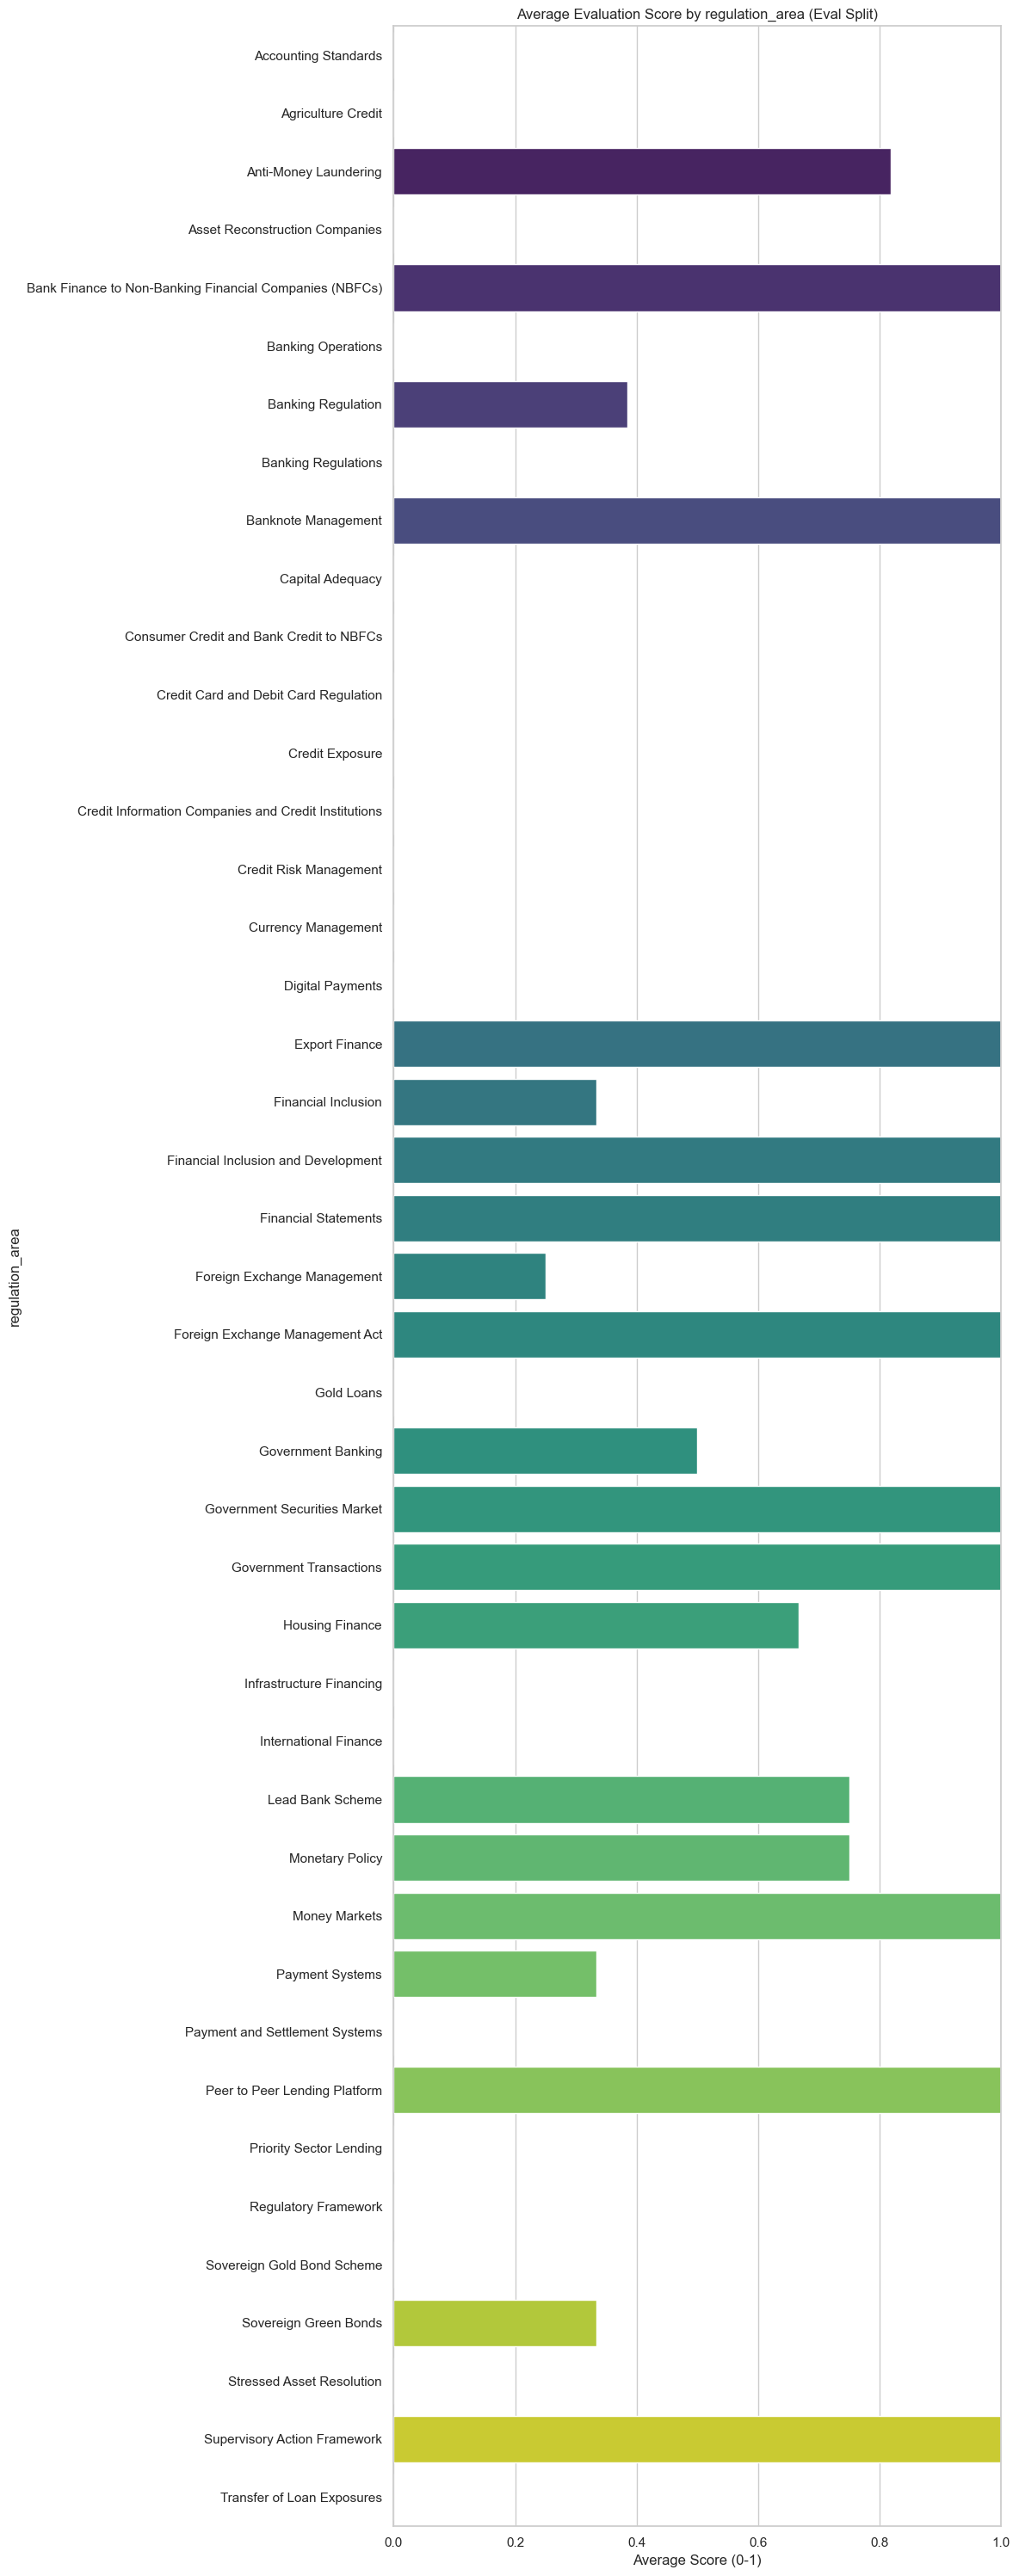

C:\Users\vishva.r\AppData\Local\Temp\ipykernel_3288\103570221.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=analysis_df, y=feature, x='Count in Eval', palette='cividis')


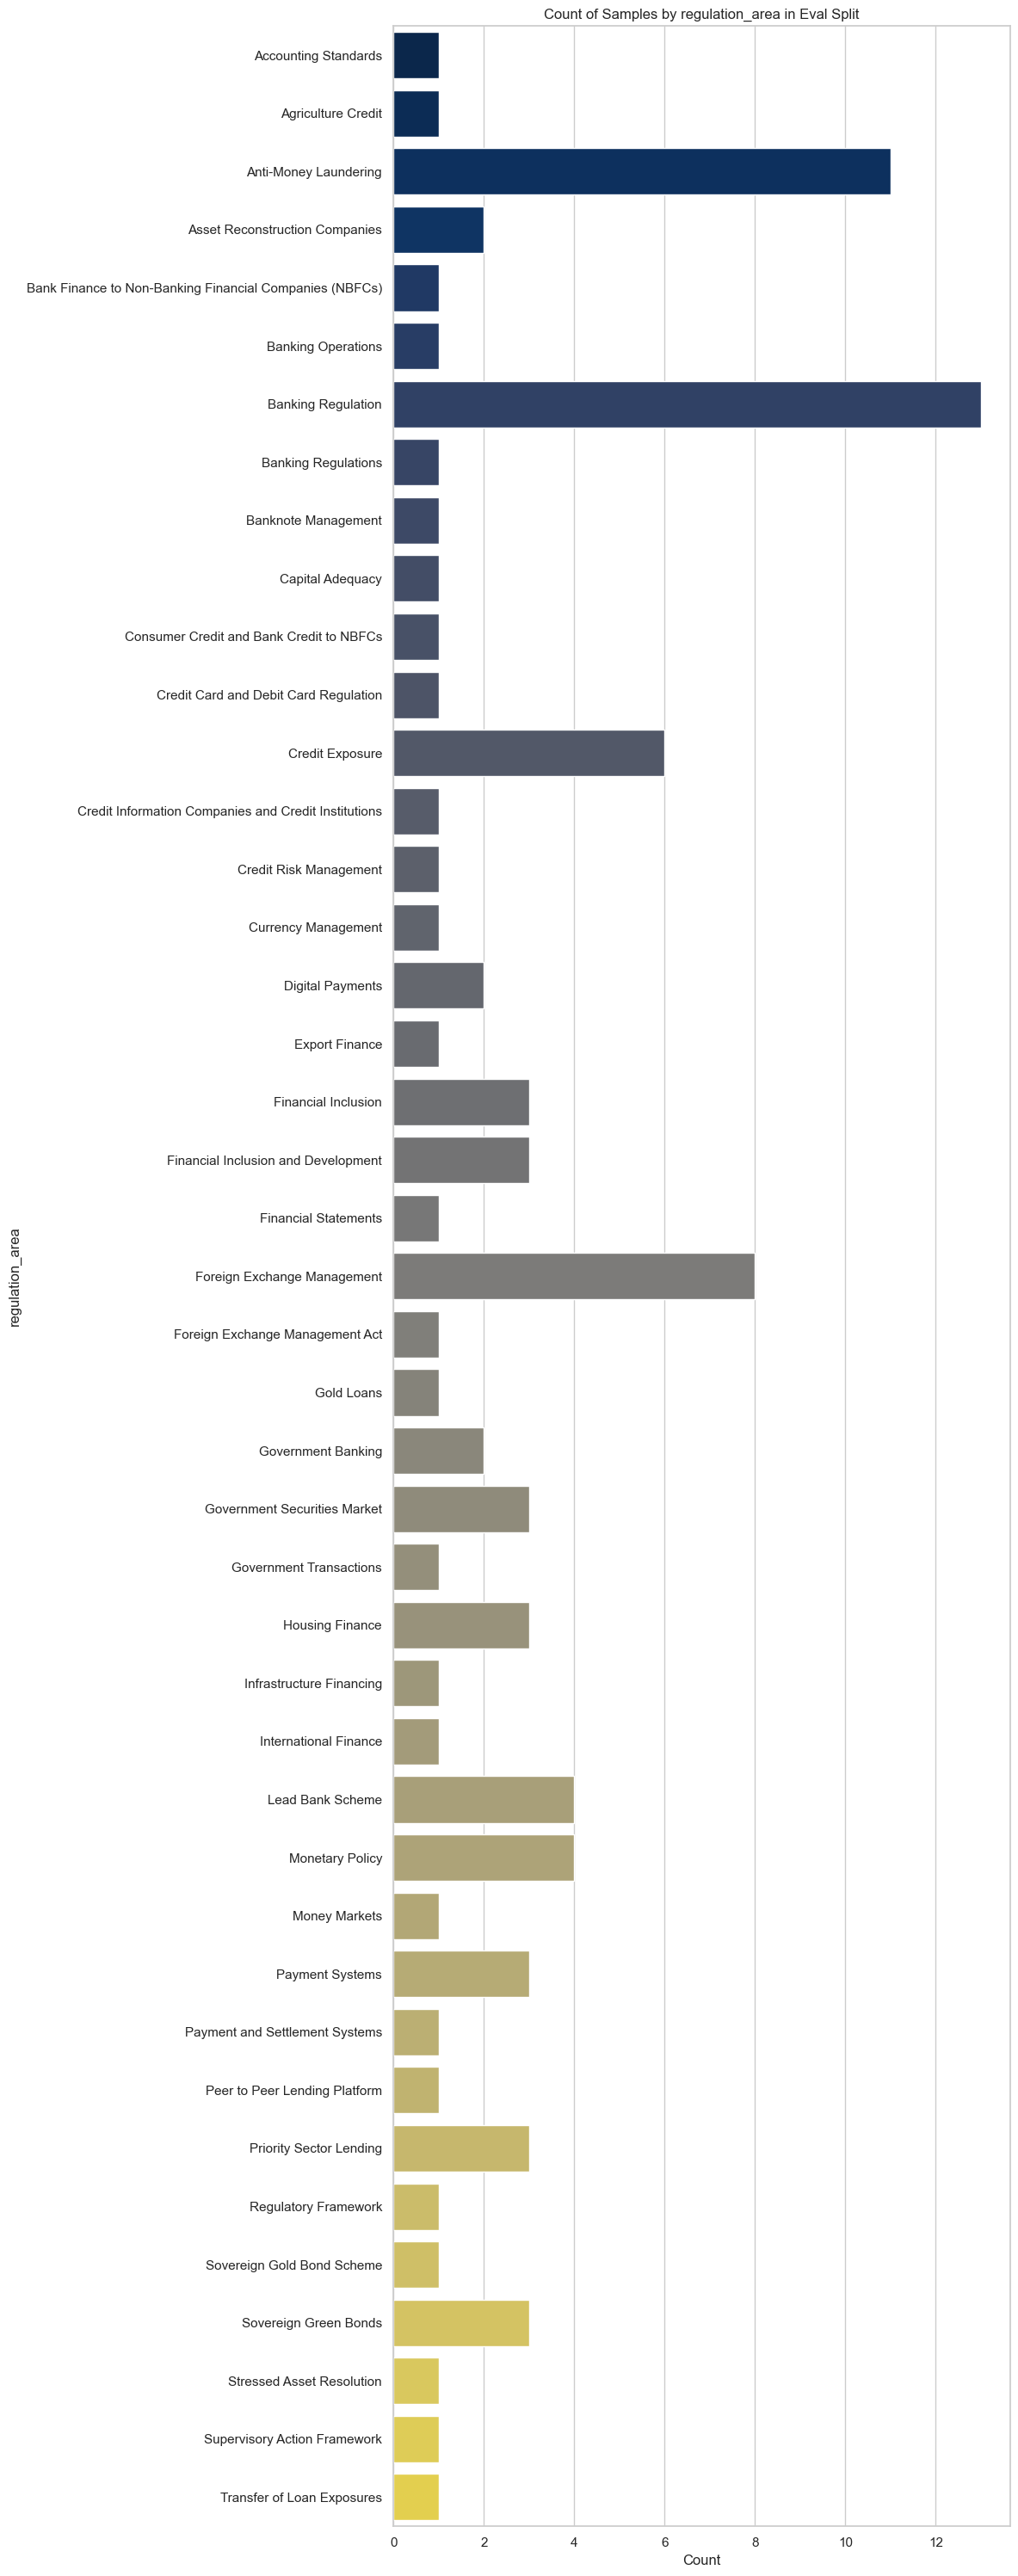


Analysis for 'applicable_to':
                                        applicable_to  Average Score  \
0                                    All Agency Banks       0.666667   
1                  All Asset Reconstruction Companies       0.000000   
2   All Authorised Dealer Category – I banks and A...       0.000000   
3                              All Authorised Persons       0.000000   
4                                           All Banks       0.666667   
5            All Category - I Authorised Dealer Banks       1.000000   
6            All Category – I Authorised Dealer Banks       1.000000   
7              All Category-I Authorised Dealer Banks       0.000000   
8   All Commercial Banks (Excluding RRBs) All Prim...       1.000000   
9   All Commercial Banks (excluding Regional Rural...       0.000000   
10  All Commercial Banks (excluding Regional Rural...       0.000000   
11  All Commercial Banks (including RRBs) and all ...       0.000000   
12  All Commercial Banks (includi

C:\Users\vishva.r\AppData\Local\Temp\ipykernel_3288\103570221.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=analysis_df, y=feature, x='Average Score', palette='viridis')
C:\Users\vishva.r\AppData\Local\Temp\ipykernel_3288\103570221.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


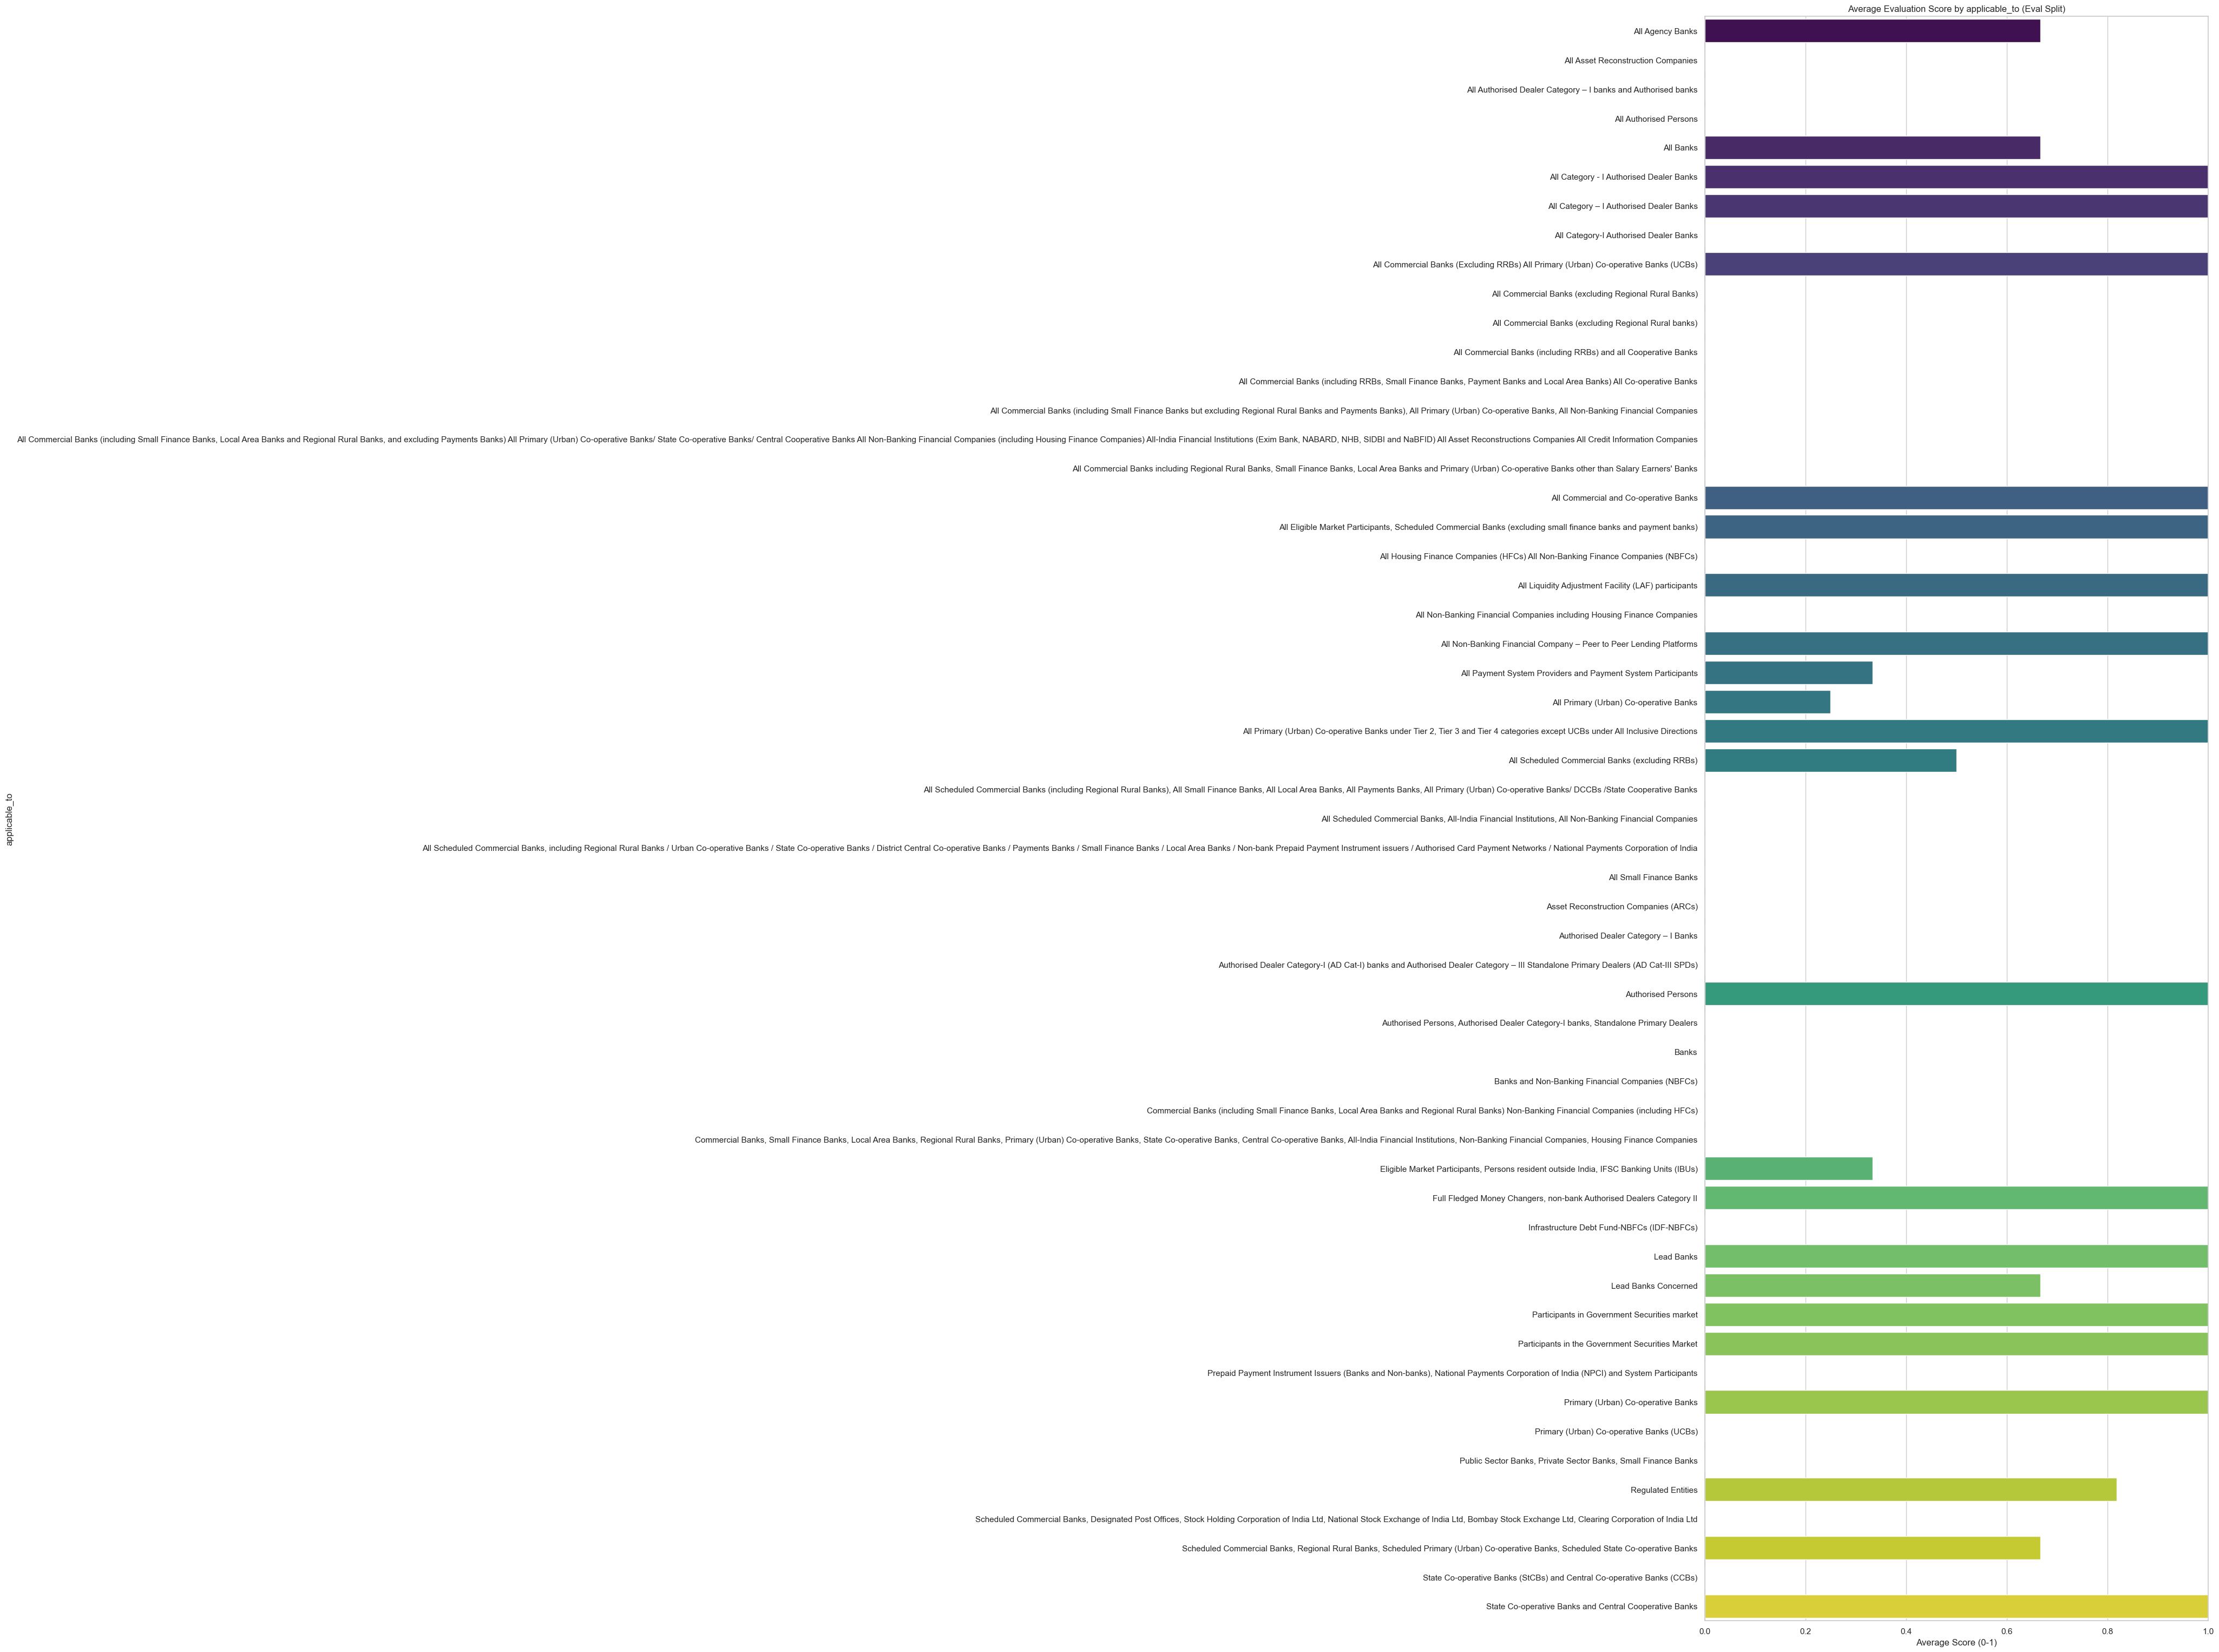

C:\Users\vishva.r\AppData\Local\Temp\ipykernel_3288\103570221.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=analysis_df, y=feature, x='Count in Eval', palette='cividis')
C:\Users\vishva.r\AppData\Local\Temp\ipykernel_3288\103570221.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


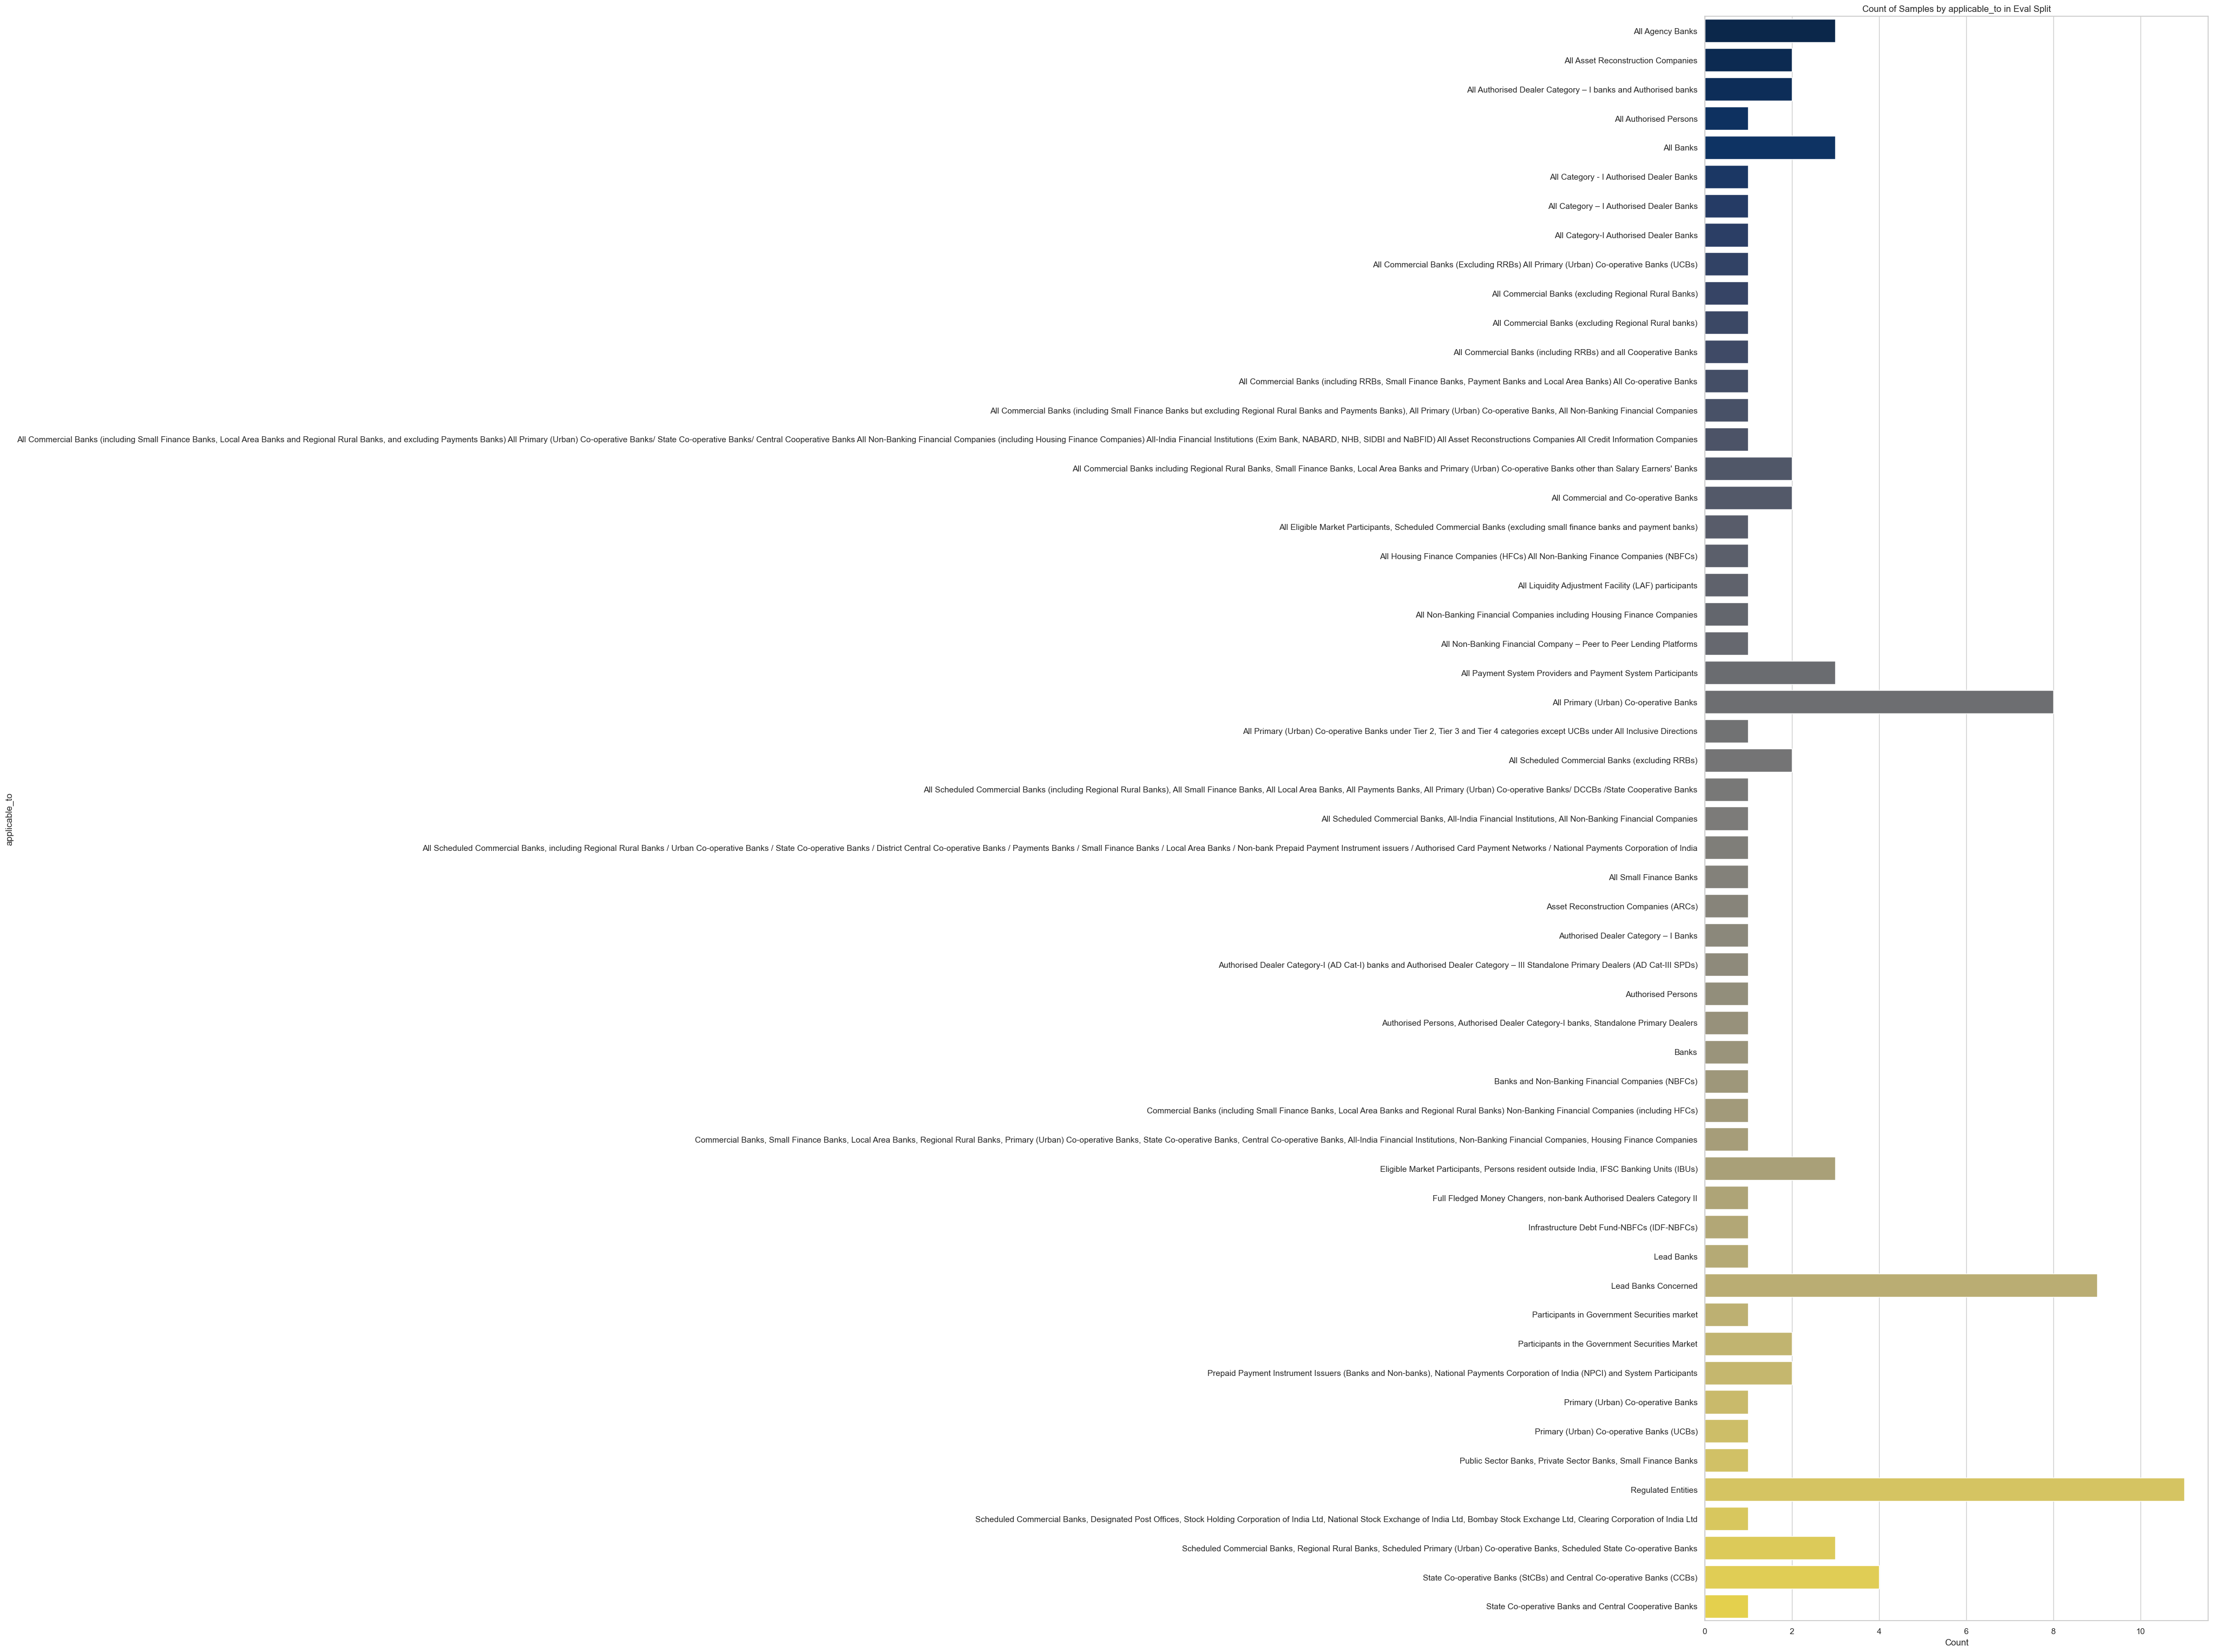


Analysis for 'category':
     category  Average Score  Count in Eval
0  fact-based           0.43            100


C:\Users\vishva.r\AppData\Local\Temp\ipykernel_3288\103570221.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=analysis_df, y=feature, x='Average Score', palette='viridis')


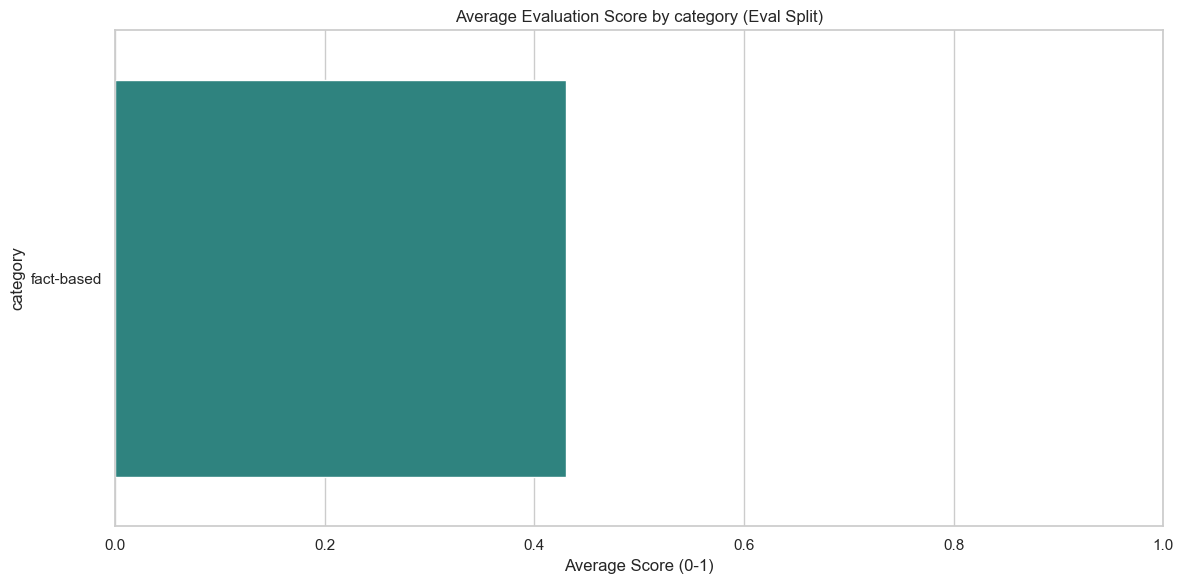

C:\Users\vishva.r\AppData\Local\Temp\ipykernel_3288\103570221.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=analysis_df, y=feature, x='Count in Eval', palette='cividis')


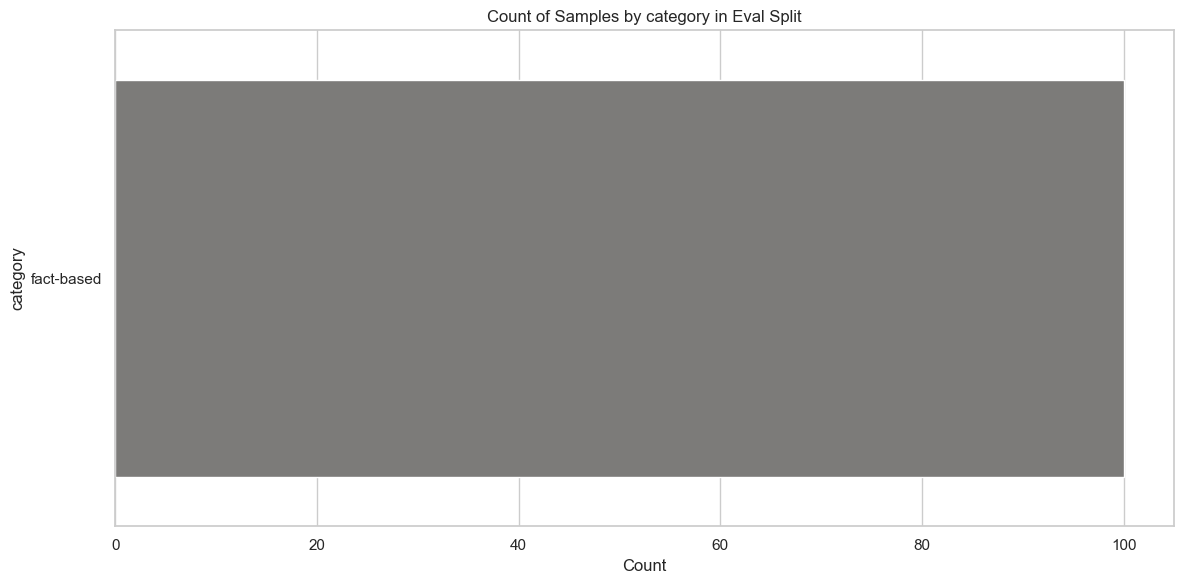

C:\Users\vishva.r\AppData\Local\Temp\ipykernel_3288\103570221.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=analysis_df, y=feature, x='Average Score', palette='viridis')



Analysis for 'estimated_difficulty_mapped':
  estimated_difficulty_mapped  Average Score  Count in Eval
0                        easy       0.750000              4
1                        hard       0.000000              1
2                      medium       0.421053             95


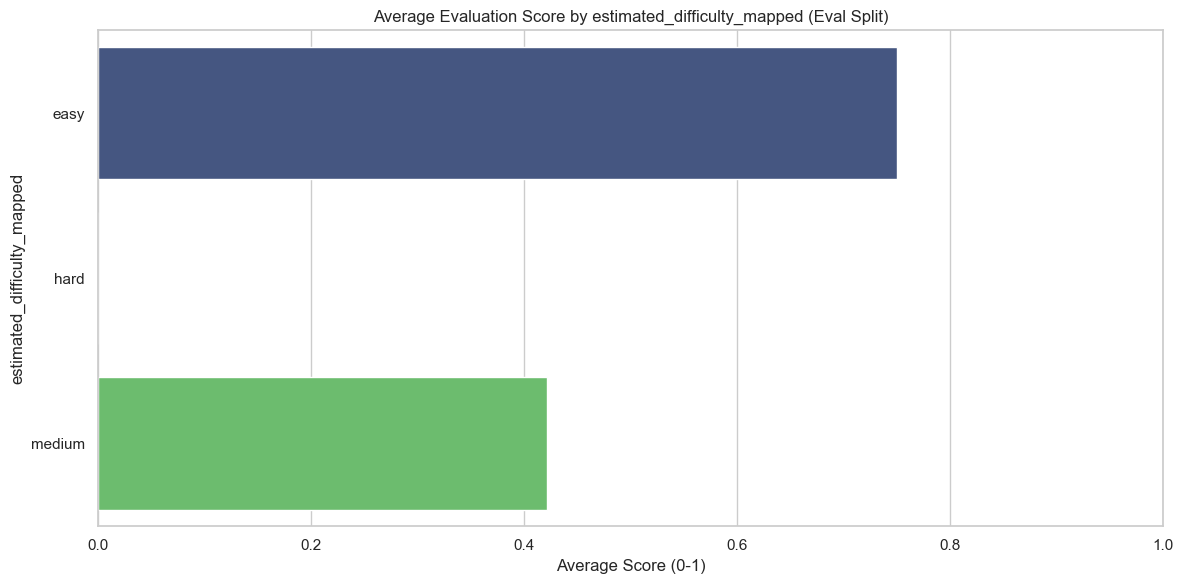

C:\Users\vishva.r\AppData\Local\Temp\ipykernel_3288\103570221.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=analysis_df, y=feature, x='Count in Eval', palette='cividis')


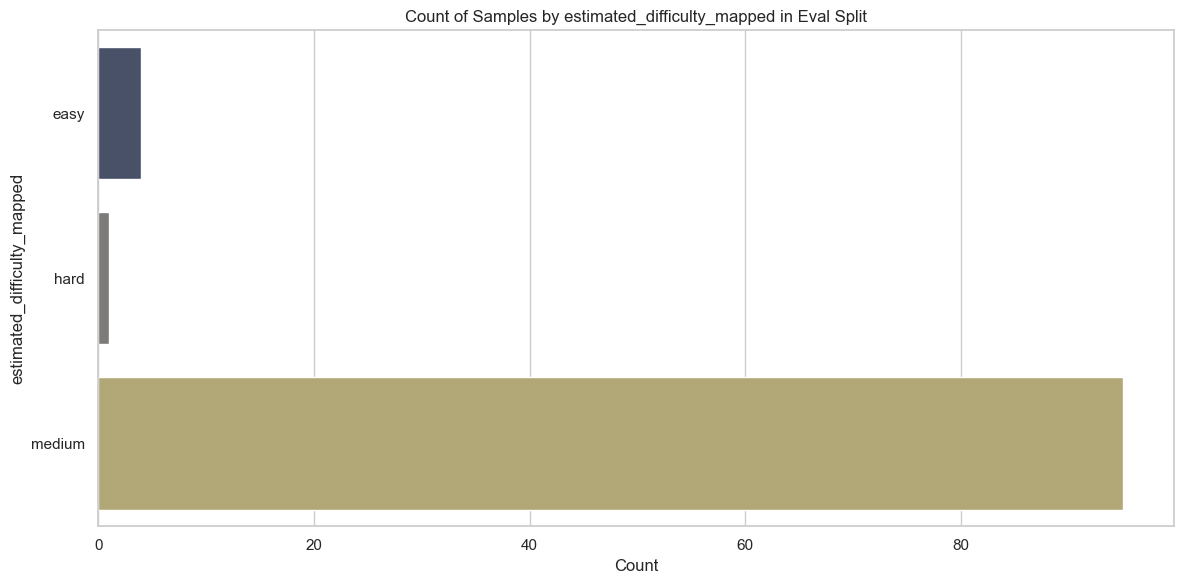

In [14]:
#  --- 5. Analyze Pass Rates by Categorical Features ---
print("\n--- Analyzing Pass Rates by Categorical Features ---")

categorical_analysis_features = ['regulation_area', 'applicable_to', 'category', 'estimated_difficulty_mapped']
# Ensure evaluation criteria is also checked for balance, though not a score-based metric
# 'evaluation_criteria' (from original dataset) might also be worth analyzing if it correlates with success/failure

for feature in categorical_analysis_features:
    if feature in df_eval_results_merged.columns:
        print(f"\nAnalysis for '{feature}':")
        
        # Calculate average score (pass rate) per category
        avg_scores = df_eval_results_merged.groupby(feature)['evaluation_score'].mean().sort_values(ascending=False)
        
        # Count the number of samples per category in the eval set
        category_counts = df_eval_results_merged[feature].value_counts()

        # Combine into a single DataFrame for easier plotting
        analysis_df = pd.DataFrame({
            'Average Score': avg_scores,
            'Count in Eval': category_counts
        }).reset_index().rename(columns={'index': feature})

        print(analysis_df)

        # Plotting Average Score per Category
        plt.figure(figsize=(12, max(6, len(analysis_df) * 0.7))) # Dynamic height for plots
        sns.barplot(data=analysis_df, y=feature, x='Average Score', palette='viridis')
        plt.title(f'Average Evaluation Score by {feature} (Eval Split)')
        plt.xlabel('Average Score (0-1)')
        plt.ylabel(feature)
        plt.xlim(0, 1) # Score is between 0 and 1
        plt.tight_layout()
        plt.show()

        # Plotting Count per Category (to directly see skewness in eval set)
        plt.figure(figsize=(12, max(6, len(analysis_df) * 0.7)))
        sns.barplot(data=analysis_df, y=feature, x='Count in Eval', palette='cividis')
        plt.title(f'Count of Samples by {feature} in Eval Split')
        plt.xlabel('Count')
        plt.ylabel(feature)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Feature '{feature}' not found in merged DataFrame.")



--- Analyzing Pass Rates by Text Lengths ---

Analysis for 'question_len':
                   Avg Score  Count Bin_Range
question_len_bins                            
0                   0.250000      4      7-11
1                   0.500000     12     11-14
2                   0.375000     16     14-17
3                   0.480000     25     17-20
4                   0.368421     19     20-23
5                   0.615385     13     23-26
6                   0.200000      5     26-29
7                   0.000000      2     29-32
8                   0.000000      2     32-35
9                   1.000000      2     35-38


<Figure size 1200x600 with 0 Axes>

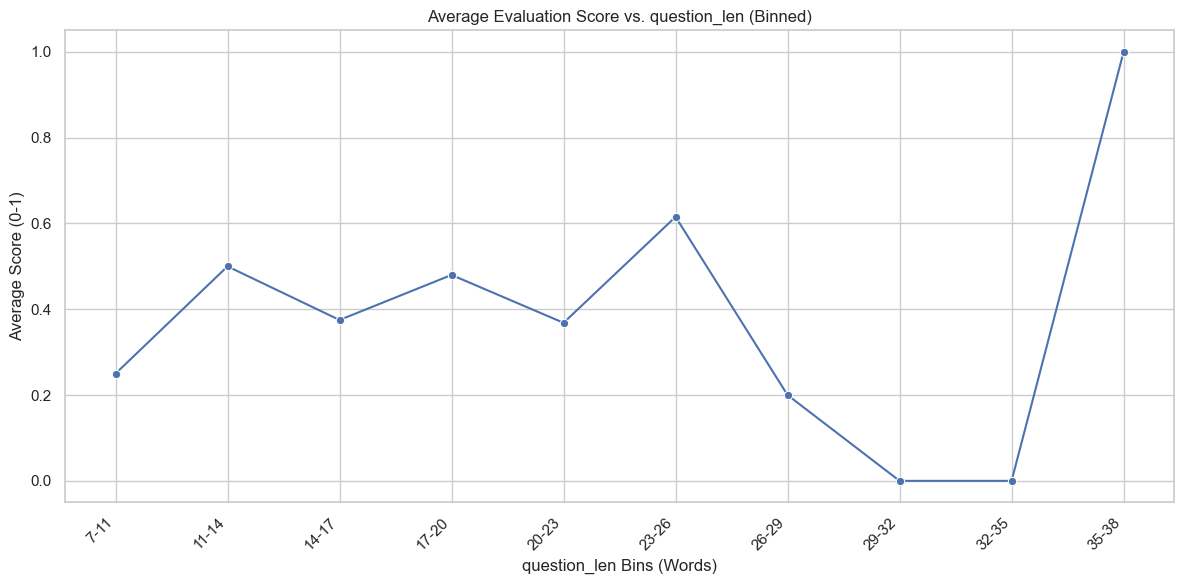


Analysis for 'answer_len':
                 Avg Score  Count Bin_Range
answer_len_bins                            
0                 0.576923     26     14-28
1                 0.533333     15     28-42
2                 0.387097     31     42-56
3                 0.307692     13     56-70
4                 0.363636     11     70-84
5                 0.000000      1     84-97
7                 0.000000      2    97-111
9                 0.000000      1   111-125


<Figure size 1200x600 with 0 Axes>

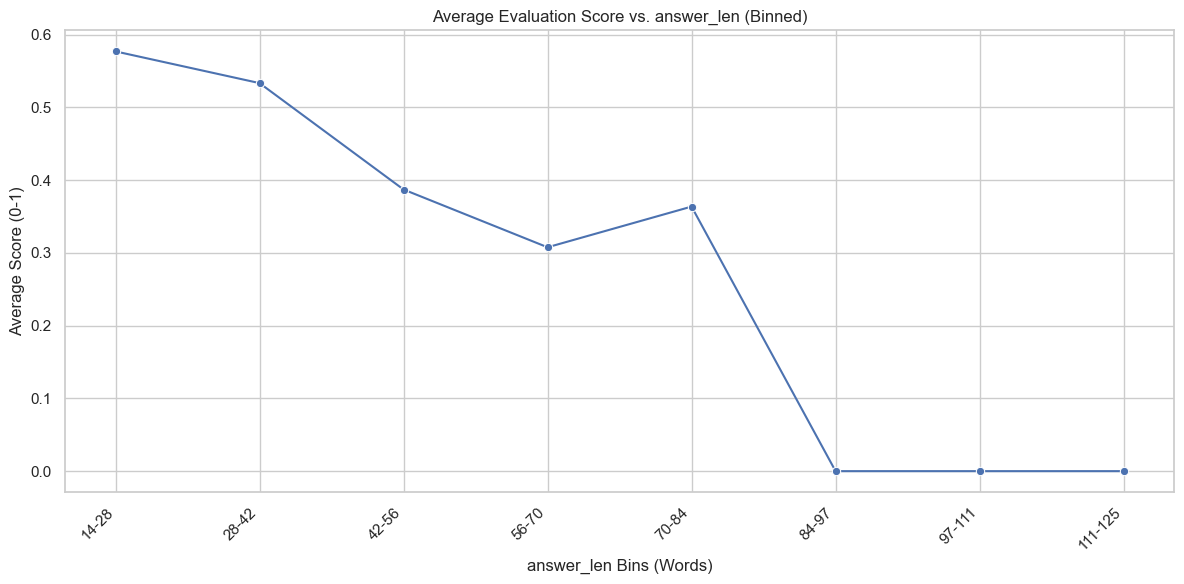


Analysis for 'rephrased_question_len':
                             Avg Score  Count Bin_Range
rephrased_question_len_bins                            
0                             0.250000      4      7-11
1                             0.727273     11     11-14
2                             0.294118     17     14-17
3                             0.600000     15     17-20
4                             0.409091     22     20-23
5                             0.625000      8     23-26
6                             0.181818     11     26-29
7                             0.500000      8     29-32
8                             0.000000      1     32-35
9                             0.000000      3     35-38


<Figure size 1200x600 with 0 Axes>

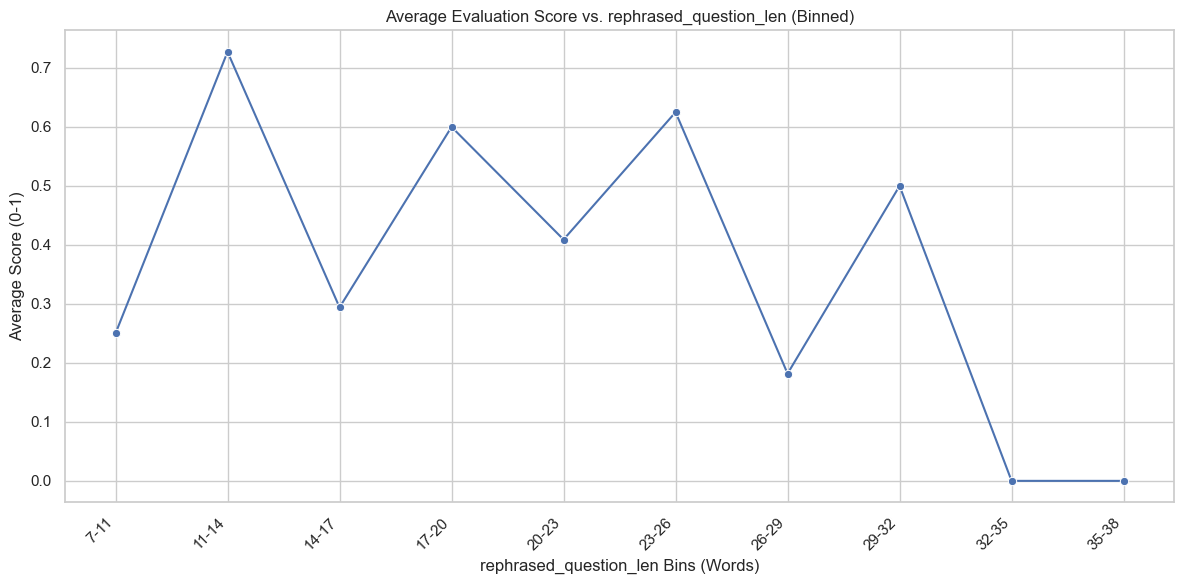


Analysis for 'rephrased_answer_len':
                           Avg Score  Count Bin_Range
rephrased_answer_len_bins                            
0                           0.545455     22     11-27
1                           0.608696     23     27-42
2                           0.428571     28     42-57
3                           0.200000     15     57-72
4                           0.285714      7     72-88
5                           0.000000      2    88-103
6                           0.000000      1   103-118
7                           0.000000      1   118-133
9                           0.000000      1   133-148


<Figure size 1200x600 with 0 Axes>

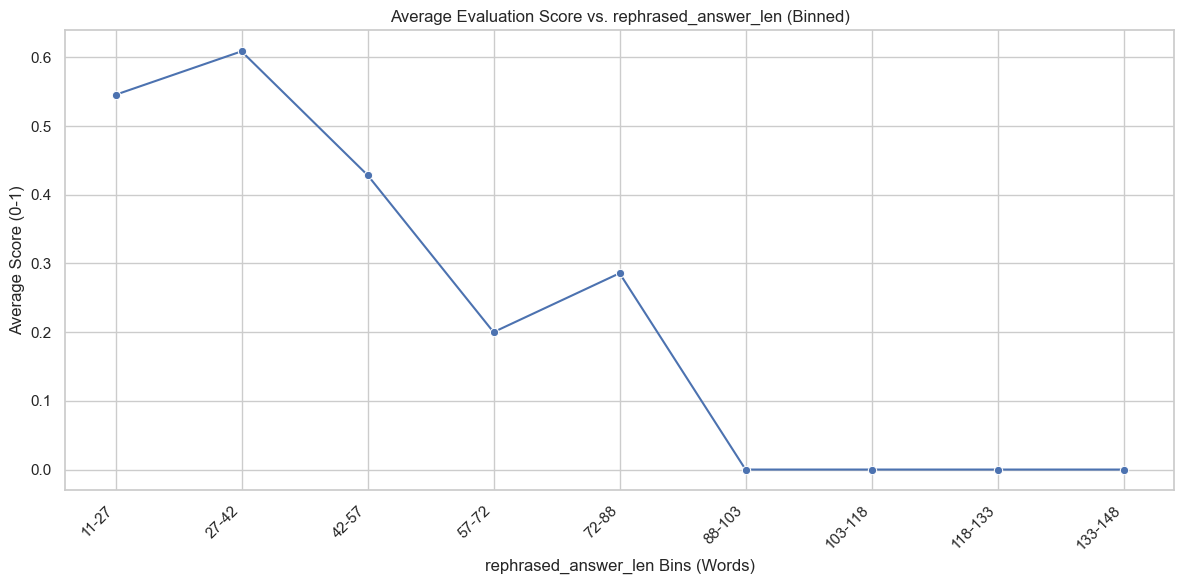


Analysis for 'chunk_len':
                Avg Score  Count Bin_Range
chunk_len_bins                            
0                0.687500     16    36-214
1                0.466667     30   214-391
2                0.352941     17   391-568
3                0.434783     23   568-745
4                0.153846     13   745-922
9                0.000000      1  922-1099


<Figure size 1200x600 with 0 Axes>

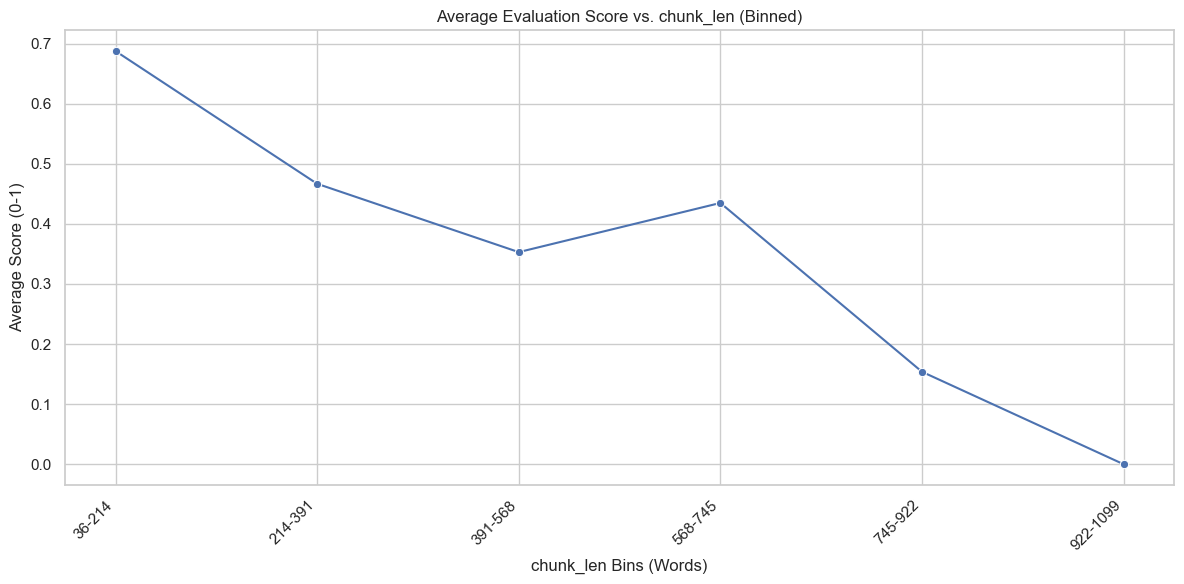


Comprehensive EDA on evaluation results and dataset characteristics complete.
Review the plots to identify correlations between dataset skewness (e.g., small counts in a category) and lower evaluation scores.
This will help pinpoint areas where your model struggles and guide further fine-tuning or data augmentation efforts.


In [15]:
# --- 6. Analyze Pass Rates by Text Lengths ---
print("\n--- Analyzing Pass Rates by Text Lengths ---")

length_features = ['question_len', 'answer_len', 'rephrased_question_len', 'rephrased_answer_len', 'chunk_len']

for length_feature in length_features:
    if length_feature in df_eval_results_merged.columns:
        print(f"\nAnalysis for '{length_feature}':")

        plt.figure(figsize=(12, 6))
        # Use a scatter plot with hue for score, or a regression plot for trend
        # For average score vs length, binning can be helpful for clarity
        
        # Bin lengths to see trends clearer
        # Adjust bin size based on typical length ranges
        df_eval_results_merged[f'{length_feature}_bins'] = pd.cut(df_eval_results_merged[length_feature], 
                                                                 bins=10, # Number of bins
                                                                 labels=False, 
                                                                 include_lowest=True)
        # Calculate average score per bin
        avg_score_by_bin = df_eval_results_merged.groupby(f'{length_feature}_bins')['evaluation_score'].mean()
        bin_counts = df_eval_results_merged[f'{length_feature}_bins'].value_counts().sort_index()

        bin_ranges = []
        for i, bin_interval in enumerate(pd.cut(df_eval_results_merged[length_feature], bins=10, include_lowest=True).cat.categories):
            bin_ranges.append(f"{int(bin_interval.left)}-{int(bin_interval.right)}")
        
        bin_analysis_df = pd.DataFrame({
            'Avg Score': avg_score_by_bin,
            'Count': bin_counts
        })
        bin_analysis_df['Bin_Range'] = bin_ranges[:len(bin_analysis_df)] # Ensure bin_ranges matches analysis_df length


        print(bin_analysis_df)

        plt.figure(figsize=(12, 6))
        sns.lineplot(data=bin_analysis_df, x='Bin_Range', y='Avg Score', marker='o')
        plt.title(f'Average Evaluation Score vs. {length_feature} (Binned)')
        plt.xlabel(f'{length_feature} Bins (Words)')
        plt.ylabel('Average Score (0-1)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # You can also use a scatter plot with jitter if individual points are desired
        # plt.figure(figsize=(12, 6))
        # sns.stripplot(data=df_eval_results_merged, x=length_feature, y='evaluation_score', jitter=0.2, alpha=0.6)
        # plt.title(f'Evaluation Score by {length_feature} (Eval Split)')
        # plt.xlabel(f'{length_feature} (Words)')
        # plt.ylabel('Evaluation Score (0 or 1)')
        # plt.tight_layout()
        # plt.show()
    else:
        print(f"Warning: Length feature '{length_feature}' not found in merged DataFrame.")

print("\nComprehensive EDA on evaluation results and dataset characteristics complete.")
print("Review the plots to identify correlations between dataset skewness (e.g., small counts in a category) and lower evaluation scores.")
print("This will help pinpoint areas where your model struggles and guide further fine-tuning or data augmentation efforts.")
